# Predictive modeling of drought levels using meteorological and soil data
 Sai Saketh Vemula, Satvik Kalyan Gundu

## INTRODUCTION

- This project aims to build predictive models for classifying drought levels in US counties based on weather and soil data.
- The dataset has been taken from Kaggle and has five different classes of Drought as seen below:

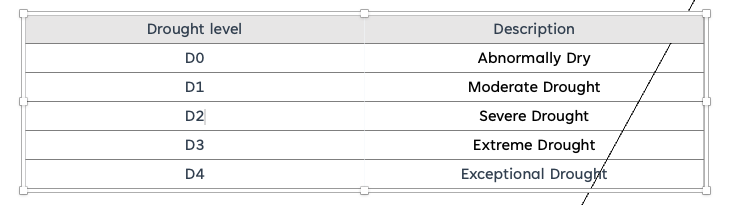

- By utilizing a combination of Data Mining and Machine learning techniques, we evaluated different models for predicting drought level and provide an insight into the contributing factors of drought conditions.



In [ ]:
import os
import subprocess
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# from google.colab import drive
# drive.mount('/content/drive')

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    roc_curve,
    auc,
)
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule, NearMiss
import pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


## Data Set Details
- We have used "Predict Droughts using Weather & Soil Data" dataset from Kaggle.
- It had 3 different csv files:
- The train and test datasets have 21 attributes including date, temperatures, wind speed, precipitation, and target column – score. The soil data has 32 attributes including elevation, water, barren and urban land, nutrients capacity, oxygen levels and toxicity

In [ ]:
path_to_soil = "/Users/satvikkalyan/Documents/SEM3/Data Mining/Project/archive/soil_data.csv"
path_to_train = "/Users/satvikkalyan/Documents/SEM3/Data Mining/Project/archive/train_timeseries/train_timeseries.csv"
path_to_test = "/Users/satvikkalyan/Documents/SEM3/Data Mining/Project/archive/test_timeseries/test_timeseries.csv"
# path_to_soil = "/content/drive/MyDrive/soil_data.csv"
# path_to_train = "/content/drive/MyDrive/train_timeseries.csv"
# path_to_test = "/content/drive/MyDrive/test_timeseries.csv"

In [ ]:
soil_data_df = pd.read_csv(path_to_soil)
soil_data_df

fips        lat         lon  elevation  slope1  slope2  slope3  slope4  \
0      1001  32.536382  -86.644490         63  0.0419  0.2788  0.2984  0.2497   
1      1005  31.870670  -85.405456        146  0.0158  0.1868  0.5441  0.2424   
2      1003  30.659218  -87.746067         52  0.0746  0.4370  0.4415  0.0469   
3      1007  33.015893  -87.127148         93  0.0144  0.1617  0.3714  0.3493   
4      1009  33.977448  -86.567246        198  0.0050  0.0872  0.2799  0.3576   
...     ...        ...         ...        ...     ...     ...     ...     ...   
3104  56037  41.660339 -108.875676       2085  0.0016  0.0281  0.1763  0.3554   
3105  56039  44.049321 -110.588102       2564  0.0003  0.0026  0.0166  0.0722   
3106  56043  43.878831 -107.669052       1417  0.0034  0.0470  0.2331  0.4099   
3107  56041  41.284726 -110.558947       2327  0.0050  0.2009  0.4063  0.1858   
3108  56045  43.846213 -104.570020       1276  0.0158  0.1958  0.6160  0.1688   

      slope5  slope6  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  \
0     0.1142  0.0170  ...    56.293411     1.014811  57.308224    1    1    1   
1     0.0106  0.0003  ...    72.578804     1.828159  74.406960    3    2    1   
2     0.0000  0.0000  ...    59.843639     2.996914  62.840553    3    2    1   
3     0.0898  0.0134  ...     1.916593     0.008330   1.924924    3    2    1   
4     0.1477  0.1037  ...     1.891909     0.027488   1.919397    3    2    1   
...      ...     ...  ...          ...          ...        ...  ...  ...  ...   
3104  0.2121  0.2097  ...     0.000000     0.000000   0.000000    1    1    3   
3105  0.1489  0.5005  ...     2.922309     0.000000   2.922309    1    1    1   
3106  0.2064  0.0999  ...     0.000000     0.000000   0.000000    1    1    1   
3107  0.0964  0.1031  ...     1.013702    10.755590  11.769293    1    1    2   
3108  0.0036  0.0000  ...     0.000000     0.007074   0.007074    1    1    2   

      SQ4  SQ5  SQ6  SQ7  
0       1    1    1    2  
1       1    1    1    1  
2       2    1    1    1  
3       1    1    1    1  
4       1    1    1    1  
...   ...  ...  ...  ...  
3104    1    1    1    3  
3105    1    1    1    1  
3106    1    1    1    1  
3107    1    1    1    2  
3108    1    1    1    2  

[3109 rows x 32 columns]

In [ ]:
test_data_X = pd.read_csv(path_to_test)
train_data_X = pd.read_csv(path_to_train)

In [ ]:
desired_records = 1000000
if len(train_data_X) > desired_records:
    train_data_X_reduced = train_data_X.sample(n=desired_records, random_state=42)
train_data_X = train_data_X_reduced

## Exploratory Data Analysis

In [ ]:
soil_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [ ]:
train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 18162412 to 13027136
Data columns (total 21 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   fips         1000000 non-null  int64  
 1   date         1000000 non-null  object 
 2   PRECTOT      1000000 non-null  float64
 3   PS           1000000 non-null  float64
 4   QV2M         1000000 non-null  float64
 5   T2M          1000000 non-null  float64
 6   T2MDEW       1000000 non-null  float64
 7   T2MWET       1000000 non-null  float64
 8   T2M_MAX      1000000 non-null  float64
 9   T2M_MIN      1000000 non-null  float64
 10  T2M_RANGE    1000000 non-null  float64
 11  TS           1000000 non-null  float64
 12  WS10M        1000000 non-null  float64
 13  WS10M_MAX    1000000 non-null  float64
 14  WS10M_MIN    1000000 non-null  float64
 15  WS10M_RANGE  1000000 non-null  float64
 16  WS50M        1000000 non-null  float64
 17  WS50M_MAX    1000000 non-null  float64

In [ ]:
test_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271948 entries, 0 to 2271947
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 364.0+ MB


In [ ]:
soil_data_df.isnull().sum()

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
dtype: int64

In [ ]:
train_data_X.isnull().sum()

fips                0
date                0
PRECTOT             0
PS                  0
QV2M                0
T2M                 0
T2MDEW              0
T2MWET              0
T2M_MAX             0
T2M_MIN             0
T2M_RANGE           0
TS                  0
WS10M               0
WS10M_MAX           0
WS10M_MIN           0
WS10M_RANGE         0
WS50M               0
WS50M_MAX           0
WS50M_MIN           0
WS50M_RANGE         0
score          857478
dtype: int64

In [ ]:
test_data_X.isnull().sum()

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          1945608
dtype: int64

### Handling missing values

In [ ]:
soil_data_df = soil_data_df.dropna()
soil_data_df.isnull().sum()

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
dtype: int64

In [ ]:
train_data_X = train_data_X.dropna()
train_data_X.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:

test_data_X = test_data_X.dropna()
test_data_X.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

### Changing data types

In [ ]:
soil_data_df.dtypes

fips               int64
lat              float64
lon              float64
elevation          int64
slope1           float64
slope2           float64
slope3           float64
slope4           float64
slope5           float64
slope6           float64
slope7           float64
slope8           float64
aspectN          float64
aspectE          float64
aspectS          float64
aspectW          float64
aspectUnknown    float64
WAT_LAND         float64
NVG_LAND         float64
URB_LAND         float64
GRS_LAND         float64
FOR_LAND         float64
CULTRF_LAND      float64
CULTIR_LAND      float64
CULT_LAND        float64
SQ1                int64
SQ2                int64
SQ3                int64
SQ4                int64
SQ5                int64
SQ6                int64
SQ7                int64
dtype: object

In [ ]:
train_data_X.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [ ]:
test_data_X.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [ ]:
def change_data_type(df):
    # Extracting year, month, and day from the 'date' column and creating new columns
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['day'] = pd.DatetimeIndex(df['date']).day
    # Rounding the 'score' column and converting its data type to integer
    df['score'] = df['score'].round().astype(int)
    return df

In [ ]:
train_data_X = change_data_type(train_data_X)
train_data_X.dtypes

/var/folders/k6/qsttcdx16gq0d36bt6bj1nsr0000gn/T/ipykernel_3843/2426648298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['date']).year
/var/folders/k6/qsttcdx16gq0d36bt6bj1nsr0000gn/T/ipykernel_3843/2426648298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['date']).month
/var/folders/k6/qsttcdx16gq0d36bt6bj1nsr0000gn/T/ipykernel_3843/2426648298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
train_data_X['score'].round().value_counts()

0    85172
1    24334
2    15253
3    10111
4     5521
5     2131
Name: score, dtype: int64

In [ ]:
test_data_X = change_data_type(test_data_X)
test_data_X.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
test_data_X['score'].round().value_counts()

0    247720
1     42486
2     22159
3      9590
4      3578
5       807
Name: score, dtype: int64

In [ ]:
train_data_X['fips'].nunique()

3108

In [ ]:
test_data_X['fips'].nunique()

3108

In [ ]:
soil_data_df['fips'].nunique()

3109

### Merging Data

In [ ]:
test_data_X_m = test_data_X.merge(soil_data_df, left_on='fips', right_on='fips')
train_data_X_m = train_data_X.merge(soil_data_df, left_on='fips', right_on='fips')

In [ ]:
train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142522 entries, 15398891 to 12637254
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fips         142522 non-null  int64  
 1   date         142522 non-null  object 
 2   PRECTOT      142522 non-null  float64
 3   PS           142522 non-null  float64
 4   QV2M         142522 non-null  float64
 5   T2M          142522 non-null  float64
 6   T2MDEW       142522 non-null  float64
 7   T2MWET       142522 non-null  float64
 8   T2M_MAX      142522 non-null  float64
 9   T2M_MIN      142522 non-null  float64
 10  T2M_RANGE    142522 non-null  float64
 11  TS           142522 non-null  float64
 12  WS10M        142522 non-null  float64
 13  WS10M_MAX    142522 non-null  float64
 14  WS10M_MIN    142522 non-null  float64
 15  WS10M_RANGE  142522 non-null  float64
 16  WS50M        142522 non-null  float64
 17  WS50M_MAX    142522 non-null  float64
 18  WS50M_MIN    14

In [ ]:
train_data_X_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142522 entries, 0 to 142521
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   fips           142522 non-null  int64  
 1   date           142522 non-null  object 
 2   PRECTOT        142522 non-null  float64
 3   PS             142522 non-null  float64
 4   QV2M           142522 non-null  float64
 5   T2M            142522 non-null  float64
 6   T2MDEW         142522 non-null  float64
 7   T2MWET         142522 non-null  float64
 8   T2M_MAX        142522 non-null  float64
 9   T2M_MIN        142522 non-null  float64
 10  T2M_RANGE      142522 non-null  float64
 11  TS             142522 non-null  float64
 12  WS10M          142522 non-null  float64
 13  WS10M_MAX      142522 non-null  float64
 14  WS10M_MIN      142522 non-null  float64
 15  WS10M_RANGE    142522 non-null  float64
 16  WS50M          142522 non-null  float64
 17  WS50M_MAX      142522 non-nul

In [ ]:
train_data_X.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
year           0
month          0
day            0
dtype: int64

In [ ]:
train_data_X_m.isnull().sum()

fips             0
date             0
PRECTOT          0
PS               0
QV2M             0
T2M              0
T2MDEW           0
T2MWET           0
T2M_MAX          0
T2M_MIN          0
T2M_RANGE        0
TS               0
WS10M            0
WS10M_MAX        0
WS10M_MIN        0
WS10M_RANGE      0
WS50M            0
WS50M_MAX        0
WS50M_MIN        0
WS50M_RANGE      0
score            0
year             0
month            0
day              0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5         

In [ ]:
test_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326340 entries, 0 to 2271945
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fips         326340 non-null  int64  
 1   date         326340 non-null  object 
 2   PRECTOT      326340 non-null  float64
 3   PS           326340 non-null  float64
 4   QV2M         326340 non-null  float64
 5   T2M          326340 non-null  float64
 6   T2MDEW       326340 non-null  float64
 7   T2MWET       326340 non-null  float64
 8   T2M_MAX      326340 non-null  float64
 9   T2M_MIN      326340 non-null  float64
 10  T2M_RANGE    326340 non-null  float64
 11  TS           326340 non-null  float64
 12  WS10M        326340 non-null  float64
 13  WS10M_MAX    326340 non-null  float64
 14  WS10M_MIN    326340 non-null  float64
 15  WS10M_RANGE  326340 non-null  float64
 16  WS50M        326340 non-null  float64
 17  WS50M_MAX    326340 non-null  float64
 18  WS50M_MIN    326340 non

In [ ]:
test_data_X_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326340 entries, 0 to 326339
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   fips           326340 non-null  int64  
 1   date           326340 non-null  object 
 2   PRECTOT        326340 non-null  float64
 3   PS             326340 non-null  float64
 4   QV2M           326340 non-null  float64
 5   T2M            326340 non-null  float64
 6   T2MDEW         326340 non-null  float64
 7   T2MWET         326340 non-null  float64
 8   T2M_MAX        326340 non-null  float64
 9   T2M_MIN        326340 non-null  float64
 10  T2M_RANGE      326340 non-null  float64
 11  TS             326340 non-null  float64
 12  WS10M          326340 non-null  float64
 13  WS10M_MAX      326340 non-null  float64
 14  WS10M_MIN      326340 non-null  float64
 15  WS10M_RANGE    326340 non-null  float64
 16  WS50M          326340 non-null  float64
 17  WS50M_MAX      326340 non-nul

In [ ]:
# For numeric columns
display(train_data_X.describe())
# For Categorical columns
display(train_data_X.describe(include=['object']))

fips        PRECTOT             PS           QV2M  \
count  142522.000000  142522.000000  142522.000000  142522.000000   
mean    30705.760051       2.696622      96.627463       7.874461   
std     14972.518076       6.185607       5.455609       4.725914   
min      1001.000000       0.000000      67.480000       0.230000   
25%     19051.000000       0.000000      95.790000       3.820000   
50%     29223.000000       0.180000      98.270000       6.920000   
75%     46011.000000       2.250000      99.930000      11.450000   
max     56043.000000     118.350000     103.750000      21.790000   

                 T2M         T2MDEW         T2MWET        T2M_MAX  \
count  142522.000000  142522.000000  142522.000000  142522.000000   
mean       12.915837       7.044135       7.079669      18.788004   
std        10.959990      10.192062      10.138244      11.593272   
min       -29.930000     -30.540000     -30.220000     -27.510000   
25%         4.590000      -0.880000      -0.840000      10.360000   
50%        14.210000       7.750000       7.760000      20.660000   
75%        22.030000      15.670000      15.670000      27.960000   
max        38.800000      26.540000      26.540000      46.540000   

             T2M_MIN      T2M_RANGE  ...      WS10M_MIN    WS10M_RANGE  \
count  142522.000000  142522.000000  ...  142522.000000  142522.000000   
mean        7.529764      11.258260  ...       1.922902       3.290816   
std        10.608047       4.041404  ...       1.343632       1.949476   
min       -37.230000       0.160000  ...       0.000000       0.290000   
25%        -0.570000       8.390000  ...       0.970000       1.820000   
50%         8.250000      11.200000  ...       1.660000       2.830000   
75%        16.310000      14.090000  ...       2.560000       4.300000   
max        32.140000      28.820000  ...      13.400000      17.240000   

               WS50M      WS50M_MAX      WS50M_MIN    WS50M_RANGE  \
count  142522.000000  142522.000000  142522.000000  142522.000000   
mean        5.540293       7.839204       3.124899       4.714275   
std         2.297784       2.839689       2.110044       2.189356   
min         0.600000       1.200000       0.000000       0.570000   
25%         3.830000       5.710000       1.460000       3.140000   
50%         5.150000       7.350000       2.770000       4.280000   
75%         6.880000       9.510000       4.390000       5.820000   
max        21.080000      25.530000      16.950000      20.600000   

               score           year          month            day  
count  142522.000000  142522.000000  142522.000000  142522.000000  
mean        0.827325    2008.011654       6.530206      15.668346  
std         1.243572       4.902830       3.441164       8.796441  
min         0.000000    2000.000000       1.000000       1.000000  
25%         0.000000    2004.000000       4.000000       8.000000  
50%         0.000000    2008.000000       7.000000      16.000000  
75%         1.000000    2012.000000      10.000000      23.000000  
max         5.000000    2016.000000      12.000000      31.000000  

[8 rows x 23 columns]

date
count       142522
unique         887
top     2005-12-13
freq           202

In [ ]:
# For numeric columns
display(train_data_X_m.describe())
# For Categorical columns
display(train_data_X_m.describe(include=['object']))

fips        PRECTOT             PS           QV2M  \
count  142522.000000  142522.000000  142522.000000  142522.000000   
mean    30705.760051       2.696622      96.627463       7.874461   
std     14972.518076       6.185607       5.455609       4.725914   
min      1001.000000       0.000000      67.480000       0.230000   
25%     19051.000000       0.000000      95.790000       3.820000   
50%     29223.000000       0.180000      98.270000       6.920000   
75%     46011.000000       2.250000      99.930000      11.450000   
max     56043.000000     118.350000     103.750000      21.790000   

                 T2M         T2MDEW         T2MWET        T2M_MAX  \
count  142522.000000  142522.000000  142522.000000  142522.000000   
mean       12.915837       7.044135       7.079669      18.788004   
std        10.959990      10.192062      10.138244      11.593272   
min       -29.930000     -30.540000     -30.220000     -27.510000   
25%         4.590000      -0.880000      -0.840000      10.360000   
50%        14.210000       7.750000       7.760000      20.660000   
75%        22.030000      15.670000      15.670000      27.960000   
max        38.800000      26.540000      26.540000      46.540000   

             T2M_MIN      T2M_RANGE  ...    CULTRF_LAND    CULTIR_LAND  \
count  142522.000000  142522.000000  ...  142522.000000  142522.000000   
mean        7.529764      11.258260  ...      28.480874       3.517318   
std        10.608047       4.041404  ...      31.869859      10.280822   
min       -37.230000       0.160000  ...       0.000000       0.000000   
25%        -0.570000       8.390000  ...       0.143526       0.045909   
50%         8.250000      11.200000  ...      13.943509       0.277091   
75%        16.310000      14.090000  ...      51.737080       1.377965   
max        32.140000      28.820000  ...      97.029572      99.956841   

           CULT_LAND            SQ1            SQ2            SQ3  \
count  142522.000000  142522.000000  142522.000000  142522.000000   
mean       31.998192       1.832398       1.555935       1.284461   
std        33.137554       1.196326       1.027675       1.009214   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.601112       1.000000       1.000000       1.000000   
50%        18.707369       1.000000       1.000000       1.000000   
75%        60.749752       3.000000       2.000000       1.000000   
max        99.956841       7.000000       7.000000       7.000000   

                 SQ4            SQ5            SQ6            SQ7  
count  142522.000000  142522.000000  142522.000000  142522.000000  
mean        1.359916       1.150229       1.138751       1.286819  
std         1.037024       0.930196       0.922937       1.023737  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       1.000000       1.000000       1.000000  
50%         1.000000       1.000000       1.000000       1.000000  
75%         1.000000       1.000000       1.000000       1.000000  
max         7.000000       7.000000       7.000000       7.000000  

[8 rows x 54 columns]

date
count       142522
unique         887
top     2005-12-13
freq           202

In [ ]:
list(train_data_X.columns)

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

In [ ]:
print(list(train_data_X_m.columns))

['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'score', 'year', 'month', 'day', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7']


In [ ]:
# For Non-Merged Data
continuous_vars = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']

drought_df_measures = train_data_X[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

In [ ]:
# For Merged Data
continuous_vars_m = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE', 'elevation','slope1','slope2','slope3','slope4','slope5','slope6','slope7','slope8','aspectN','aspectE','aspectS','aspectW','aspectUnknown','WAT_LAND','NVG_LAND','URB_LAND','GRS_LAND','FOR_LAND','CULTRF_LAND','CULTIR_LAND','CULT_LAND','SQ1','SQ2','SQ3','SQ4','SQ5','SQ6','SQ7']

drought_df_measures_m = train_data_X_m[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE', 'elevation','slope1','slope2','slope3','slope4','slope5','slope6','slope7','slope8','aspectN','aspectE','aspectS','aspectW','aspectUnknown','WAT_LAND','NVG_LAND','URB_LAND','GRS_LAND','FOR_LAND','CULTRF_LAND','CULTIR_LAND','CULT_LAND','SQ1','SQ2','SQ3','SQ4','SQ5','SQ6','SQ7']]

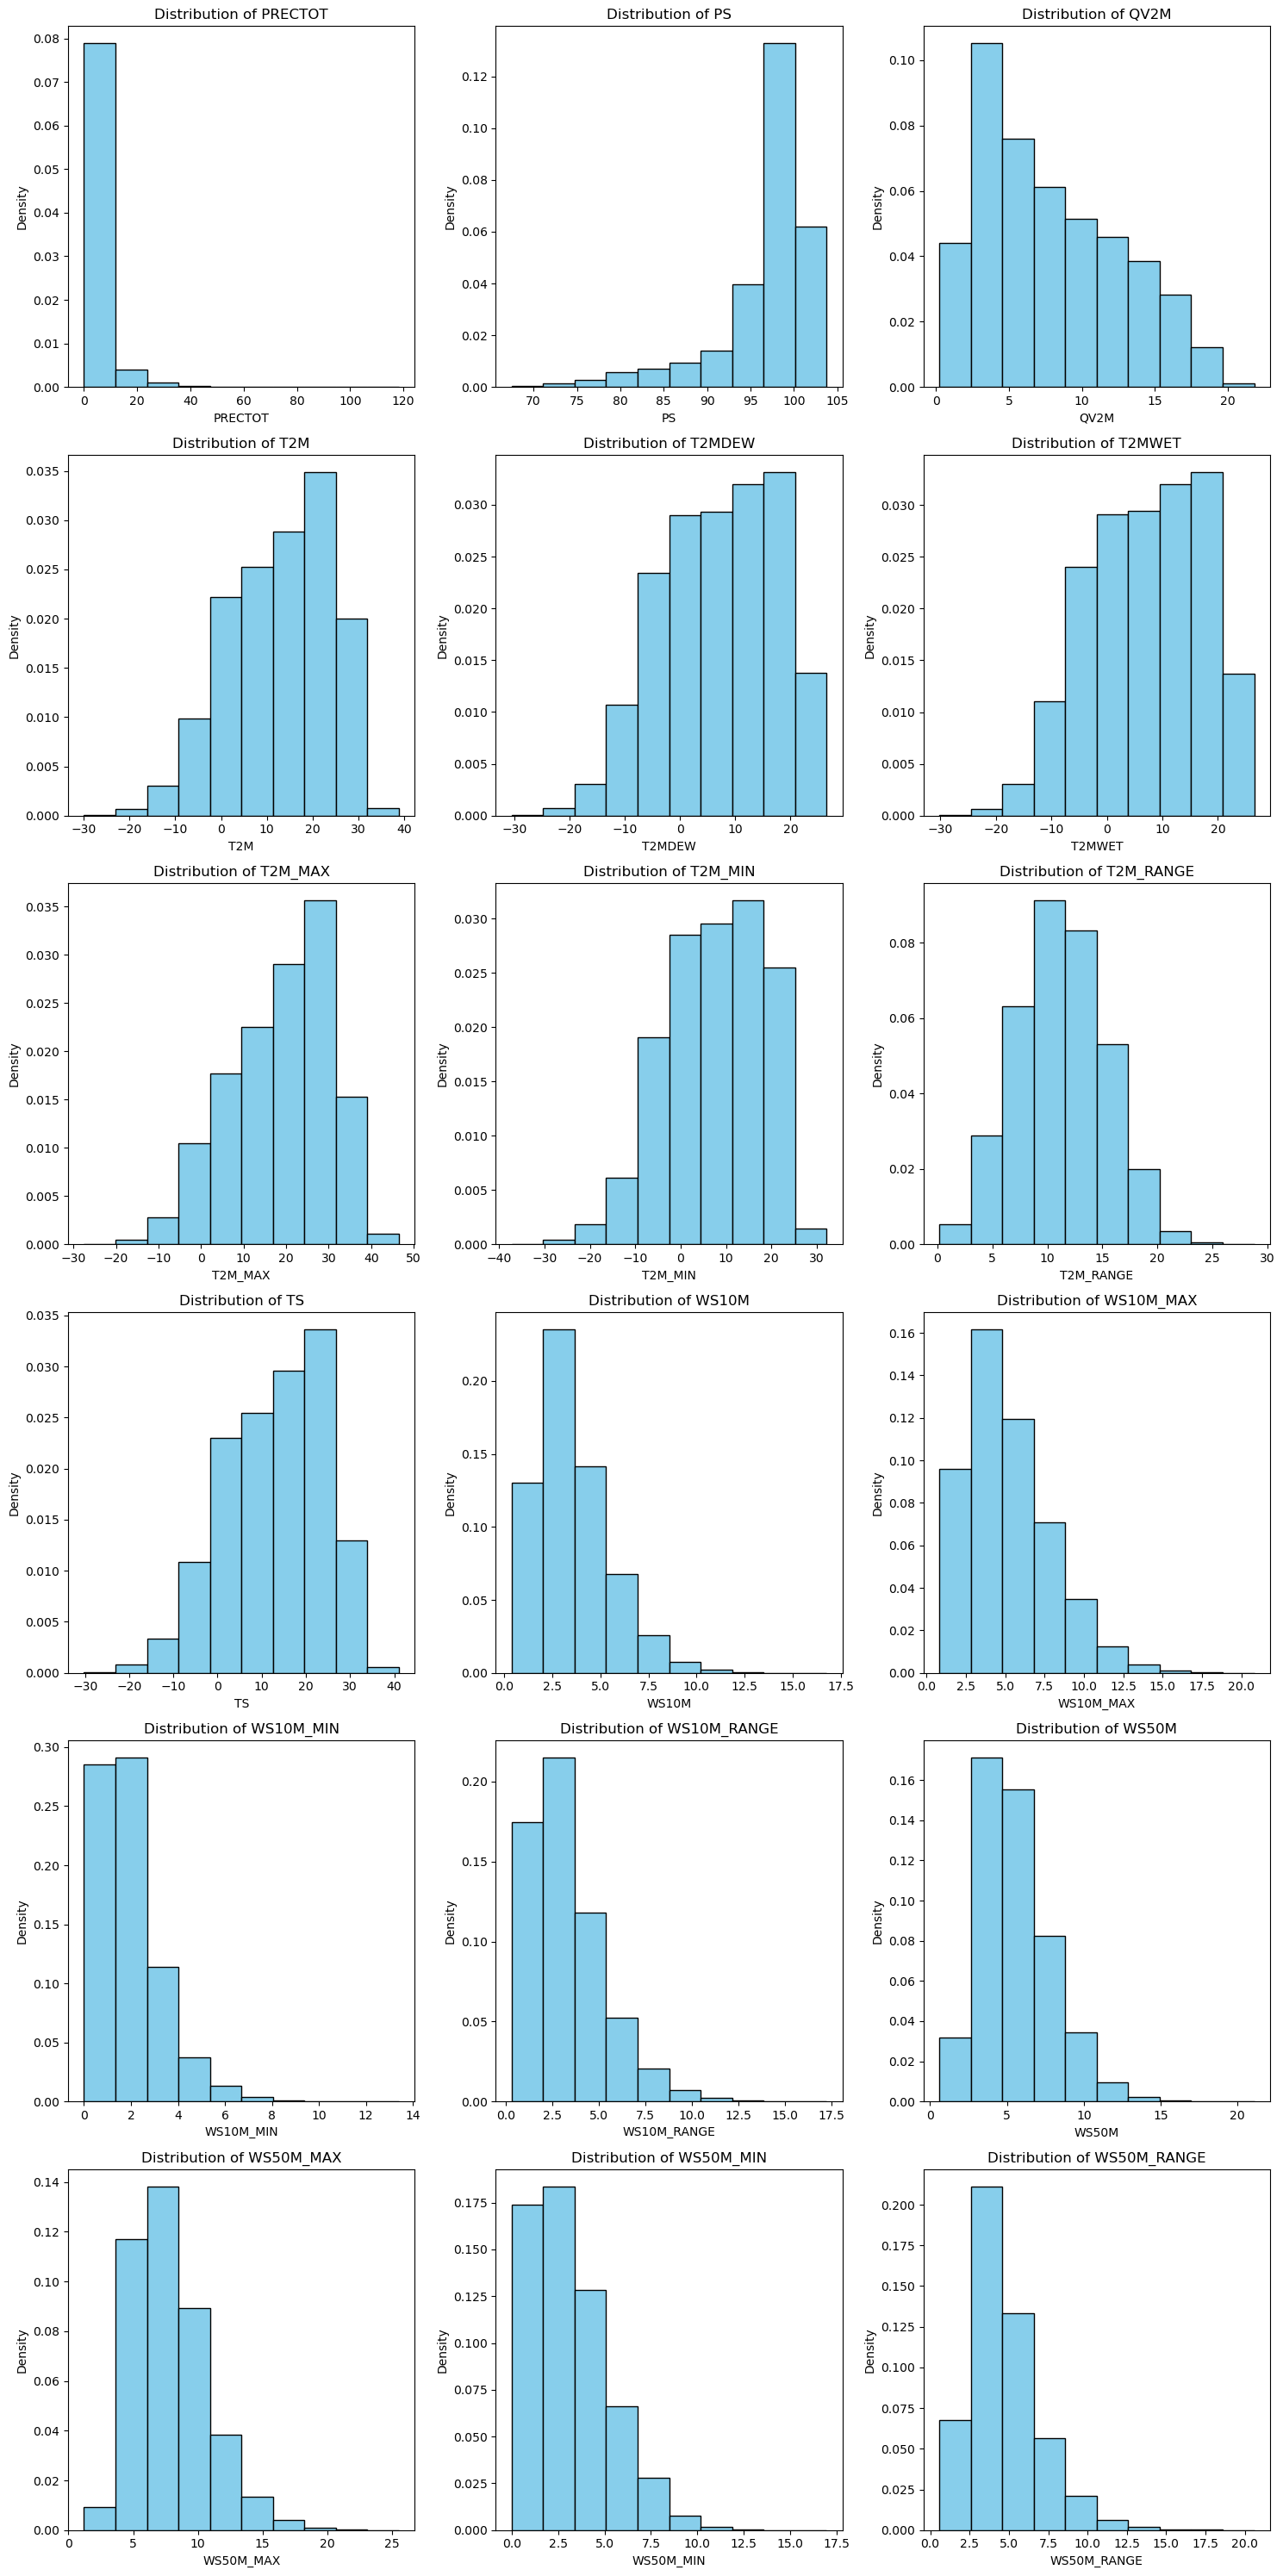

In [ ]:
# For Non-Merged Data
vars_per_row = 3
total_continuous_vars = len(continuous_vars)
num_rows = (total_continuous_vars + vars_per_row - 1) // vars_per_row
fig, axs = plt.subplots(num_rows, vars_per_row, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Iterate through each continuous variable
for i, col_name in enumerate(continuous_vars):
    axs[i].hist(drought_df_measures[col_name], density=True, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(col_name)
    axs[i].set_ylabel('Density')
    axs[i].set_title(f'Distribution of {col_name}')

for i in range(total_continuous_vars, num_rows * vars_per_row):
    axs[i].axis('off')
plt.tight_layout()
plt.show()

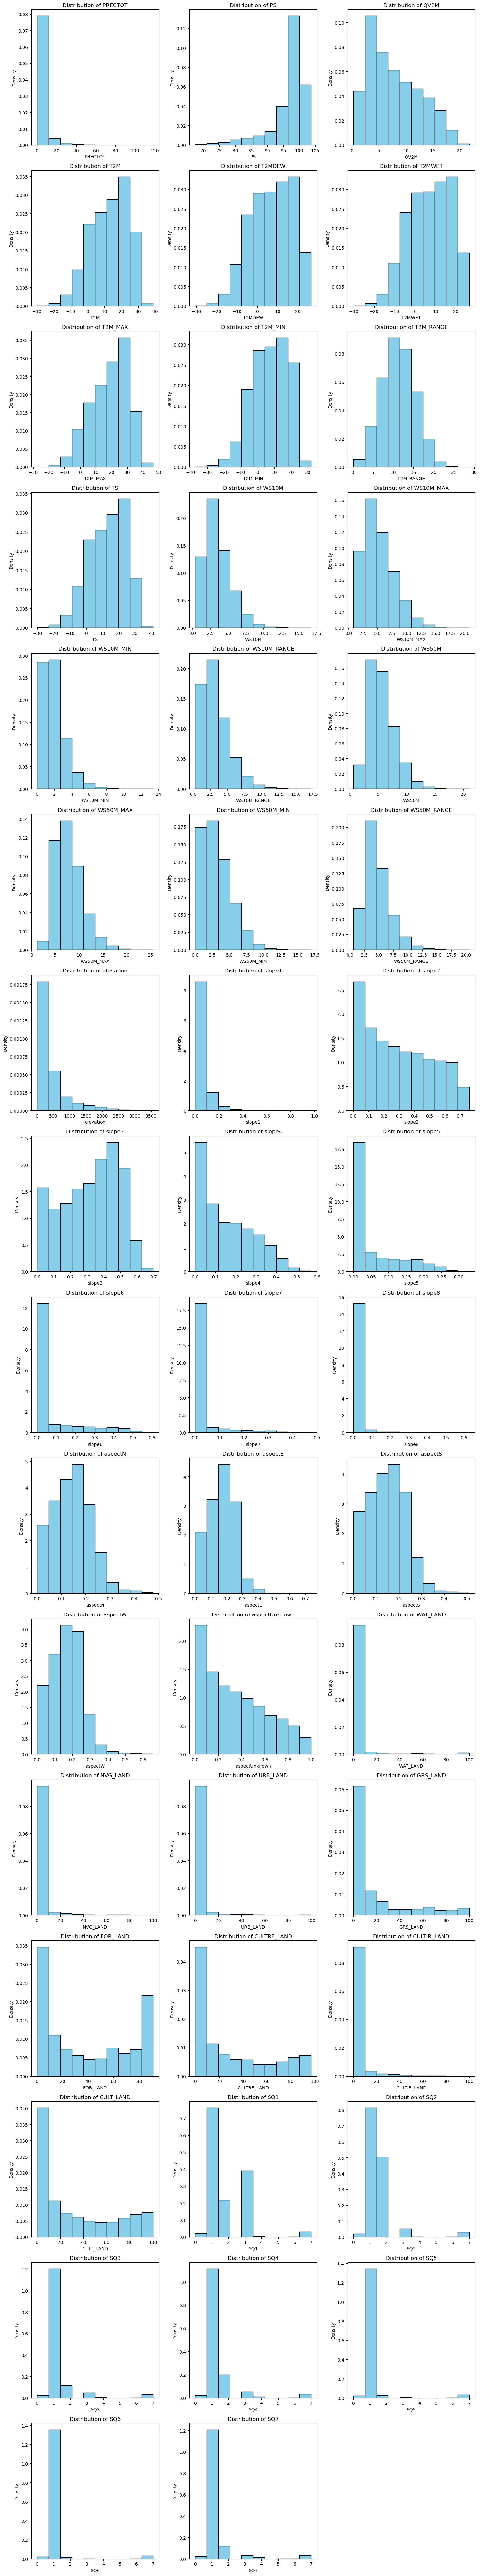

In [ ]:
# For Merged Data
vars_per_row = 3
total_continuous_vars = len(continuous_vars_m)
num_rows = (total_continuous_vars + vars_per_row - 1) // vars_per_row
fig, axs = plt.subplots(num_rows, vars_per_row, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Iterate through each continuous variable
for i, col_name in enumerate(continuous_vars_m):
    axs[i].hist(drought_df_measures_m[col_name], density=True, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(col_name)
    axs[i].set_ylabel('Density')
    axs[i].set_title(f'Distribution of {col_name}')

for i in range(total_continuous_vars, num_rows * vars_per_row):
    axs[i].axis('off')
plt.tight_layout()
plt.show()

### Handling Outliers

- Started off with plotting bar plots of continuous variables against their density. We observed the density of some attributes to be skewed so we looked for outliers.
- Plotted box plots of these continuous variables and saw that most attributes had a lot of outliers.
- We calculated the number of outliers for these data points outside the range: (mean-3*std_deviation, mean+3*std_deviation) and found that quite a few attributes had 1000s of data points outside this range.
- So, we started eliminating outliers by selecting those datapoints whose value is in the range (mean-3*std_deviation, mean+3*std_deviation). This reduced the data points from 2756796 to 2474336.



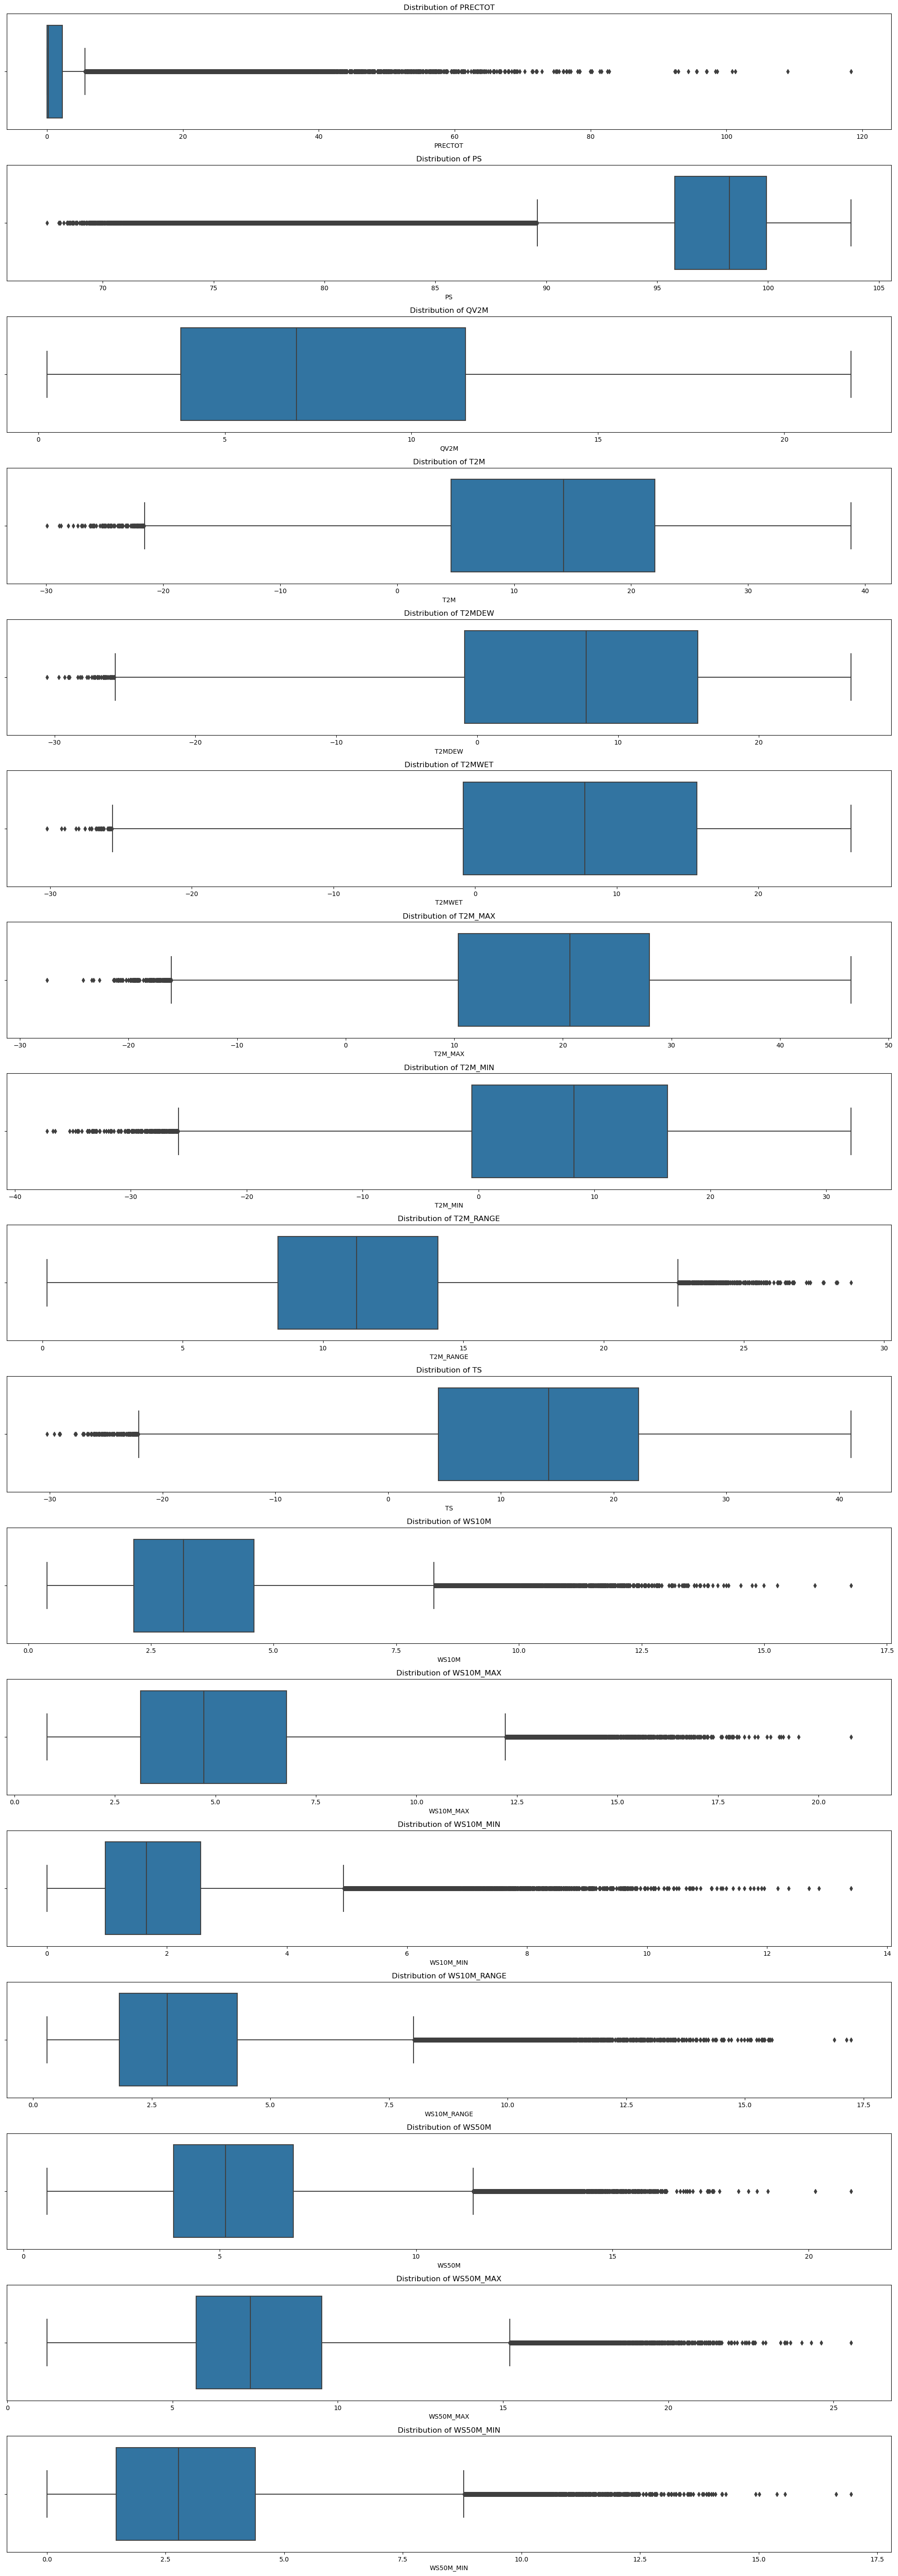

In [ ]:
# For Non-Merged Data
plt.figure(figsize=(20, 60))

# Iterate through each continuous variable
for x in (range(1, len(continuous_vars))):
    plt.subplot(len(continuous_vars), 1, x)
    sns.boxplot(x=drought_df_measures.columns[x - 1], data=drought_df_measures)
    x_name = drought_df_measures.columns[x - 1]
    plt.xlabel(x_name)
    plt.title(f'Distribution of {x_name}')
plt.tight_layout()
plt.show()


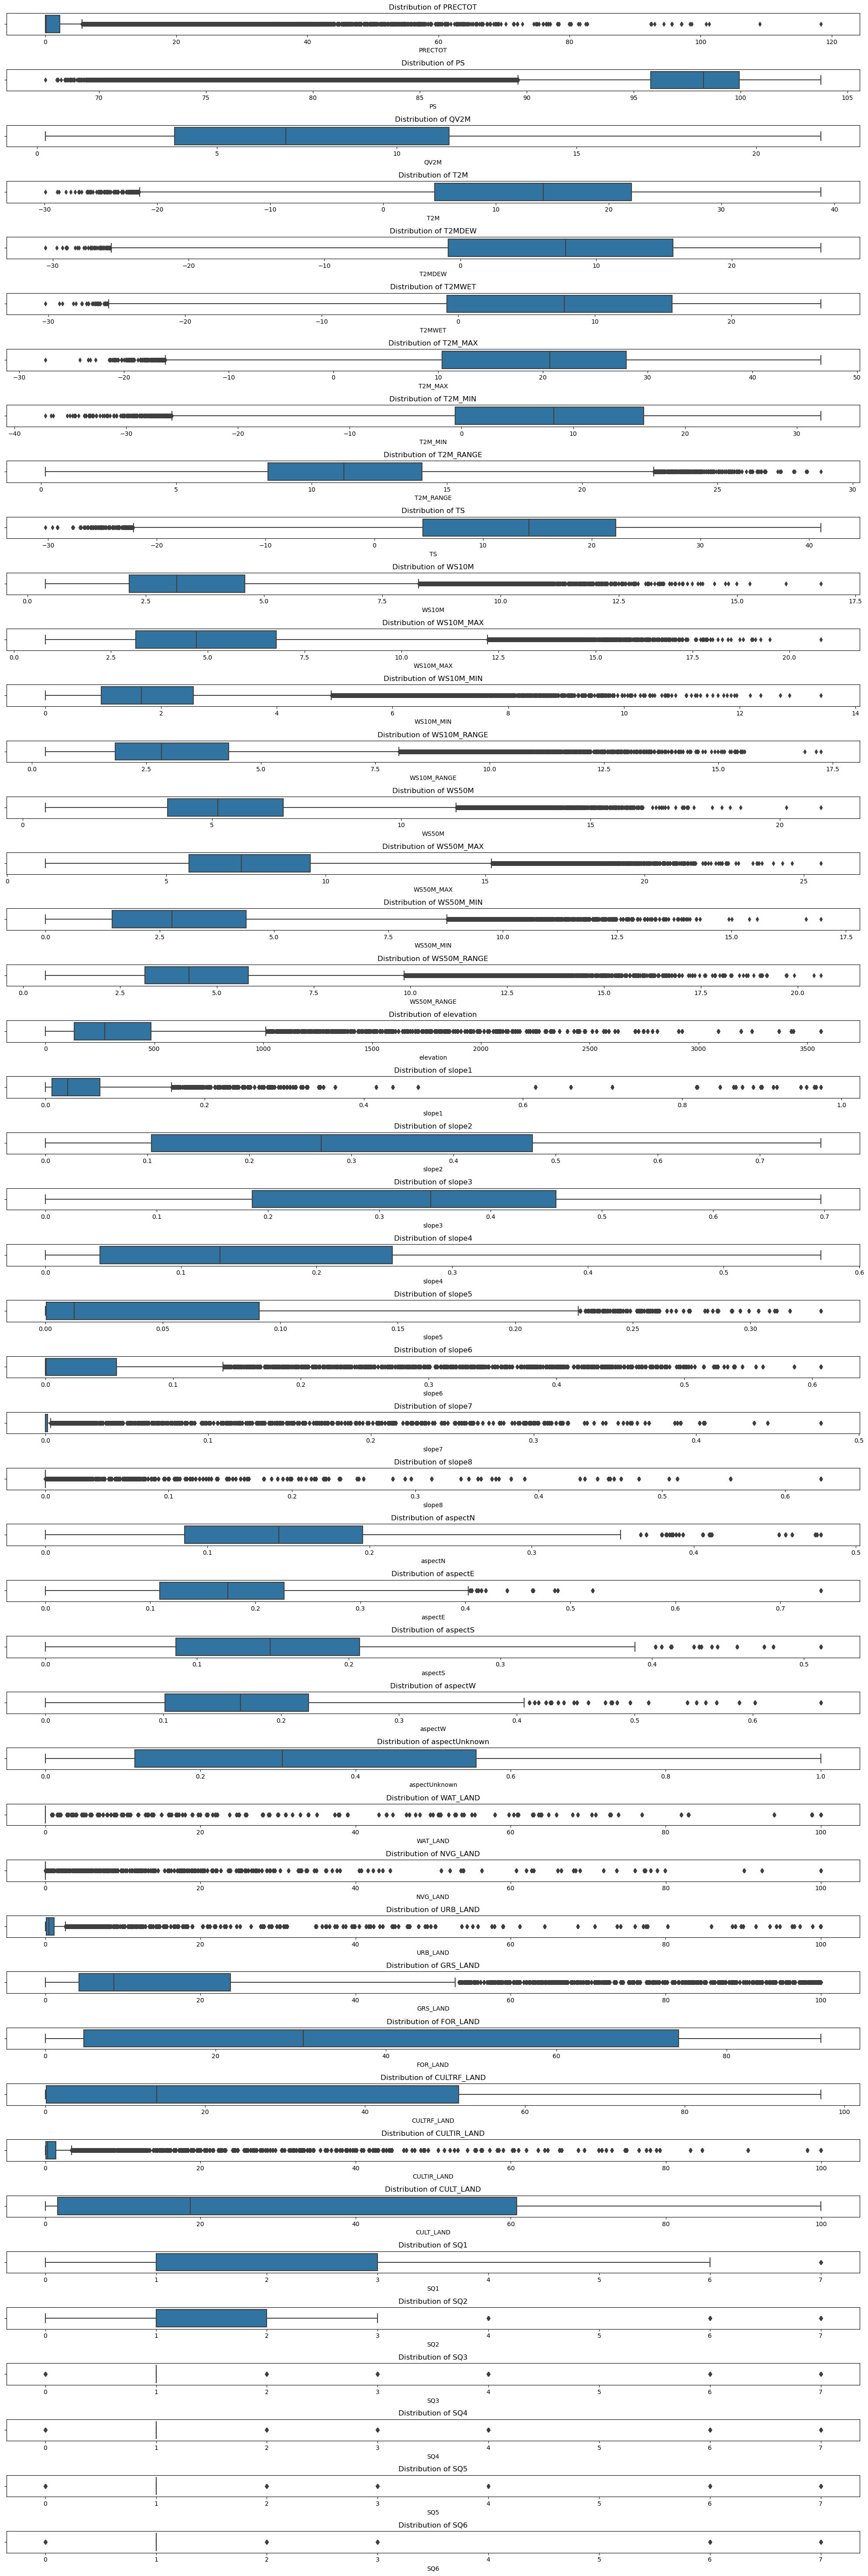

In [ ]:
# For Merged Data
plt.figure(figsize=(20, 60))

# Iterate through each continuous variable
for x in (range(1, len(continuous_vars_m))):
    plt.subplot(len(continuous_vars_m), 1, x)
    sns.boxplot(x=drought_df_measures_m.columns[x - 1], data=drought_df_measures_m)
    x_name = drought_df_measures_m.columns[x - 1]
    plt.xlabel(x_name)
    plt.title(f'Distribution of {x_name}')
plt.tight_layout()
plt.show()


In [ ]:
# For Non-Merged Data
total_rows = len(drought_df_measures.index)
print(f'Total rows = {total_rows}')
for column in drought_df_measures.select_dtypes(exclude=['object']).columns:
    outlier_values = drought_df_measures[
        (drought_df_measures[column] > drought_df_measures[column].mean() + 3 * drought_df_measures[column].std()) |
        (drought_df_measures[column] < drought_df_measures[column].mean() - 3 * drought_df_measures[column].std())
    ]
    num_outliers = len(outlier_values)
    print(f'Number of values beyond standard outlier limit in {column}: {num_outliers}')

Total rows = 142522
Number of values beyond standard outlier limit in PRECTOT: 3399
Number of values beyond standard outlier limit in PS: 3793
Number of values beyond standard outlier limit in QV2M: 0
Number of values beyond standard outlier limit in T2M: 231
Number of values beyond standard outlier limit in T2MDEW: 96
Number of values beyond standard outlier limit in T2MWET: 76
Number of values beyond standard outlier limit in T2M_MAX: 163
Number of values beyond standard outlier limit in T2M_MIN: 333
Number of values beyond standard outlier limit in T2M_RANGE: 204
Number of values beyond standard outlier limit in TS: 230
Number of values beyond standard outlier limit in WS10M: 1534
Number of values beyond standard outlier limit in WS10M_MAX: 1205
Number of values beyond standard outlier limit in WS10M_MIN: 2060
Number of values beyond standard outlier limit in WS10M_RANGE: 1828
Number of values beyond standard outlier limit in WS50M: 1183
Number of values beyond standard outlier limi

In [ ]:
# For Merged Data
total_rows = len(drought_df_measures_m.index)
print(f'Total rows = {total_rows}')
for column in drought_df_measures_m.select_dtypes(exclude=['object']).columns:
    outlier_values = drought_df_measures_m[
        (drought_df_measures_m[column] > drought_df_measures_m[column].mean() + 3 * drought_df_measures_m[column].std()) |
        (drought_df_measures_m[column] < drought_df_measures_m[column].mean() - 3 * drought_df_measures_m[column].std())
    ]
    num_outliers = len(outlier_values)
    print(f'Number of values beyond standard outlier limit in {column}: {num_outliers}')

Total rows = 142522
Number of values beyond standard outlier limit in PRECTOT: 3399
Number of values beyond standard outlier limit in PS: 3793
Number of values beyond standard outlier limit in QV2M: 0
Number of values beyond standard outlier limit in T2M: 231
Number of values beyond standard outlier limit in T2MDEW: 96
Number of values beyond standard outlier limit in T2MWET: 76
Number of values beyond standard outlier limit in T2M_MAX: 163
Number of values beyond standard outlier limit in T2M_MIN: 333
Number of values beyond standard outlier limit in T2M_RANGE: 204
Number of values beyond standard outlier limit in TS: 230
Number of values beyond standard outlier limit in WS10M: 1534
Number of values beyond standard outlier limit in WS10M_MAX: 1205
Number of values beyond standard outlier limit in WS10M_MIN: 2060
Number of values beyond standard outlier limit in WS10M_RANGE: 1828
Number of values beyond standard outlier limit in WS50M: 1183
Number of values beyond standard outlier limi

#### Removing values beyond the standard outlier limit

In [ ]:
def filter_outliers(df, column_name):
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()
    filtered_df = df[(df[column_name] <= mean_value + 3 * std_value) & (df[column_name] >= mean_value - 3 * std_value)]
    return filtered_df

In [ ]:
# For Non- Merged Data
columns_to_filter = [
    'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
    'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE'
]

# Filtering outliers for each column
for column in columns_to_filter:
    train_data_X = filter_outliers(train_data_X, column)

print('Total rows =', len(train_data_X.index))


Total rows = 127942


In [ ]:
# For Non- Merged Data
for column in columns_to_filter:
    train_data_X_m = filter_outliers(train_data_X_m, column)

print('Total rows =', len(train_data_X_m.index))


Total rows = 127942


- Next for the categorical variables 'score', 'year', 'month', 'day' we plotted the distribution using bar plots.
- Looking at the bar plot for year and month we observed the data has been consistently taken from the years 2000 to 2016.
- Whereas looking at the score values, the values are not equally distributed from all the drought categories. The plots can be seen below:


In [ ]:
# # For Non-Merged Data
categorical_column_list = ['score', 'year', 'month', 'day']


drought_df_categorical = train_data_X[categorical_column_list]


In [ ]:
# # For Merged Data
drought_df_categorical_m = train_data_X_m[categorical_column_list]


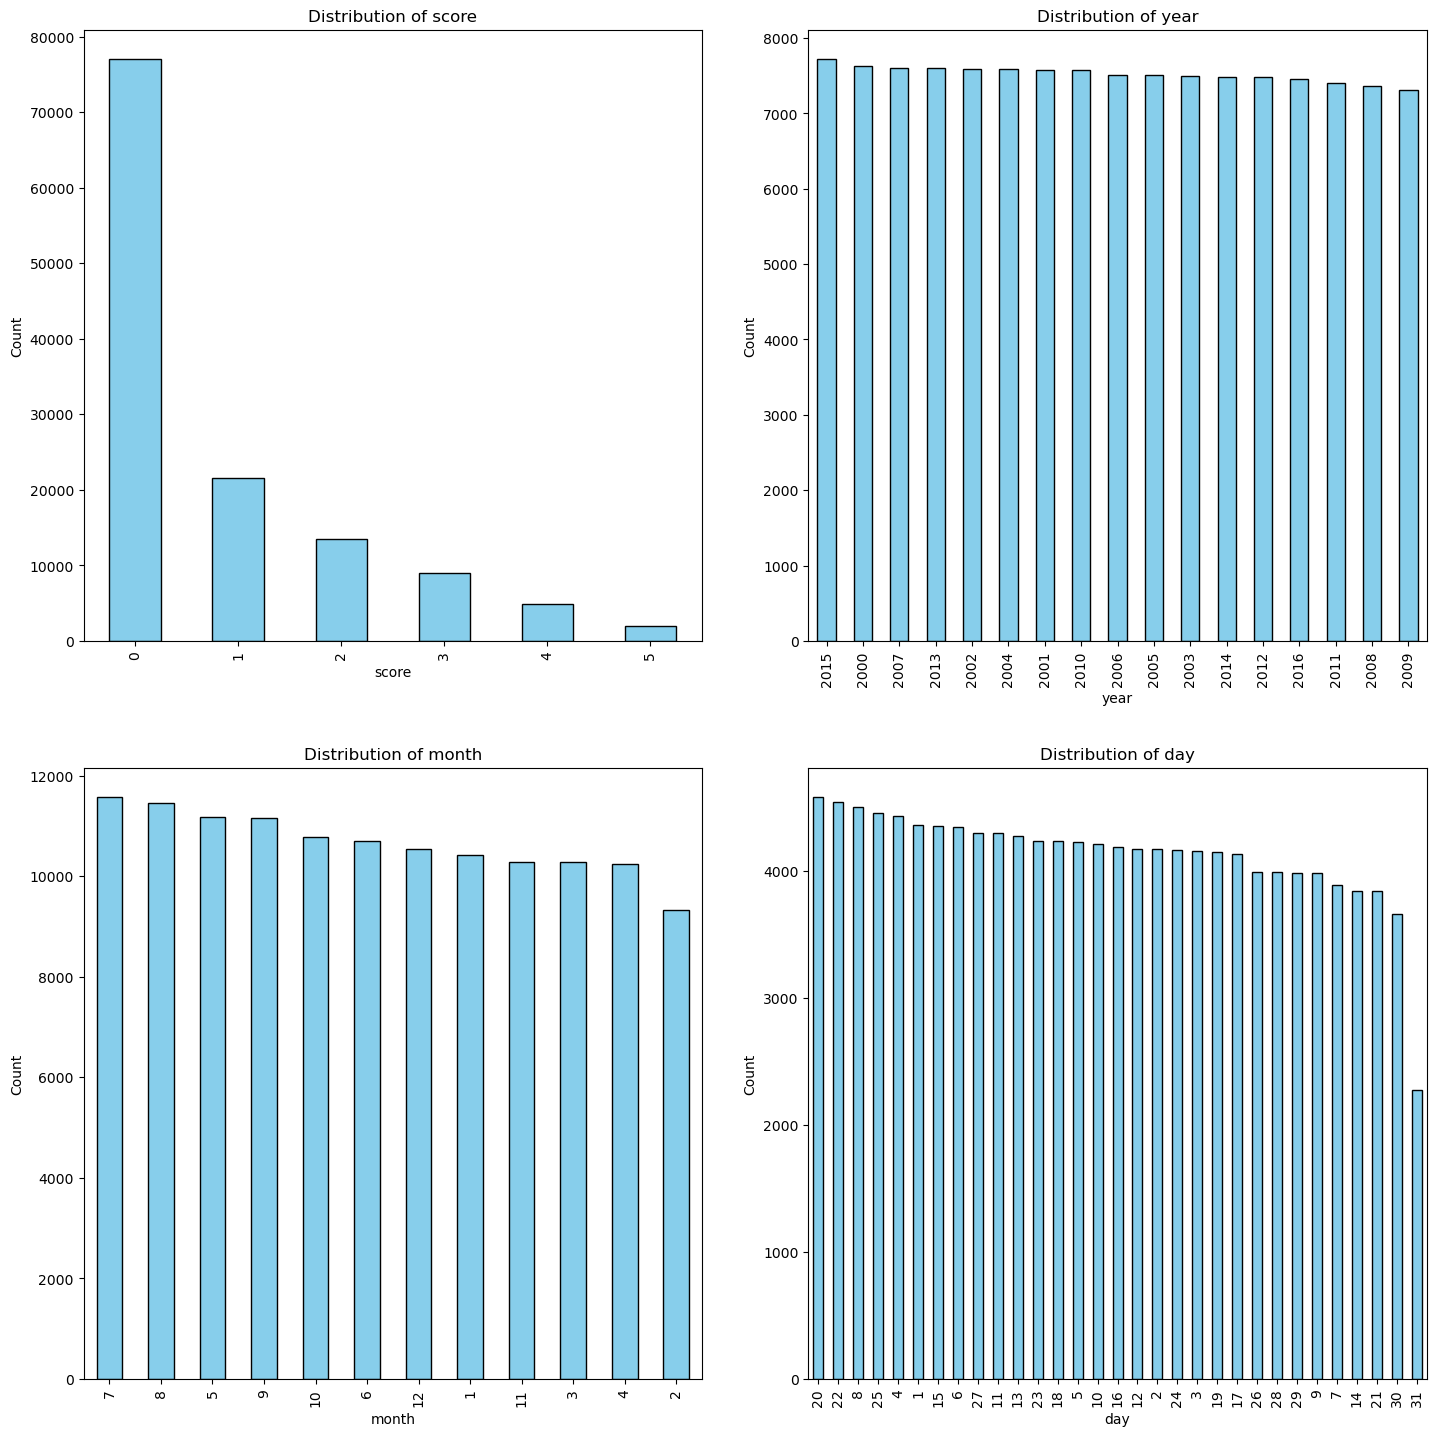

In [ ]:
#For Non- Merged Data
plt.figure(figsize=(15, 15))
for i, col_name in enumerate(categorical_column_list, start=1):
    plt.subplot(2, 2, i)
    drought_df_categorical[col_name].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col_name}')
    plt.tight_layout(pad=3.0)

plt.show()

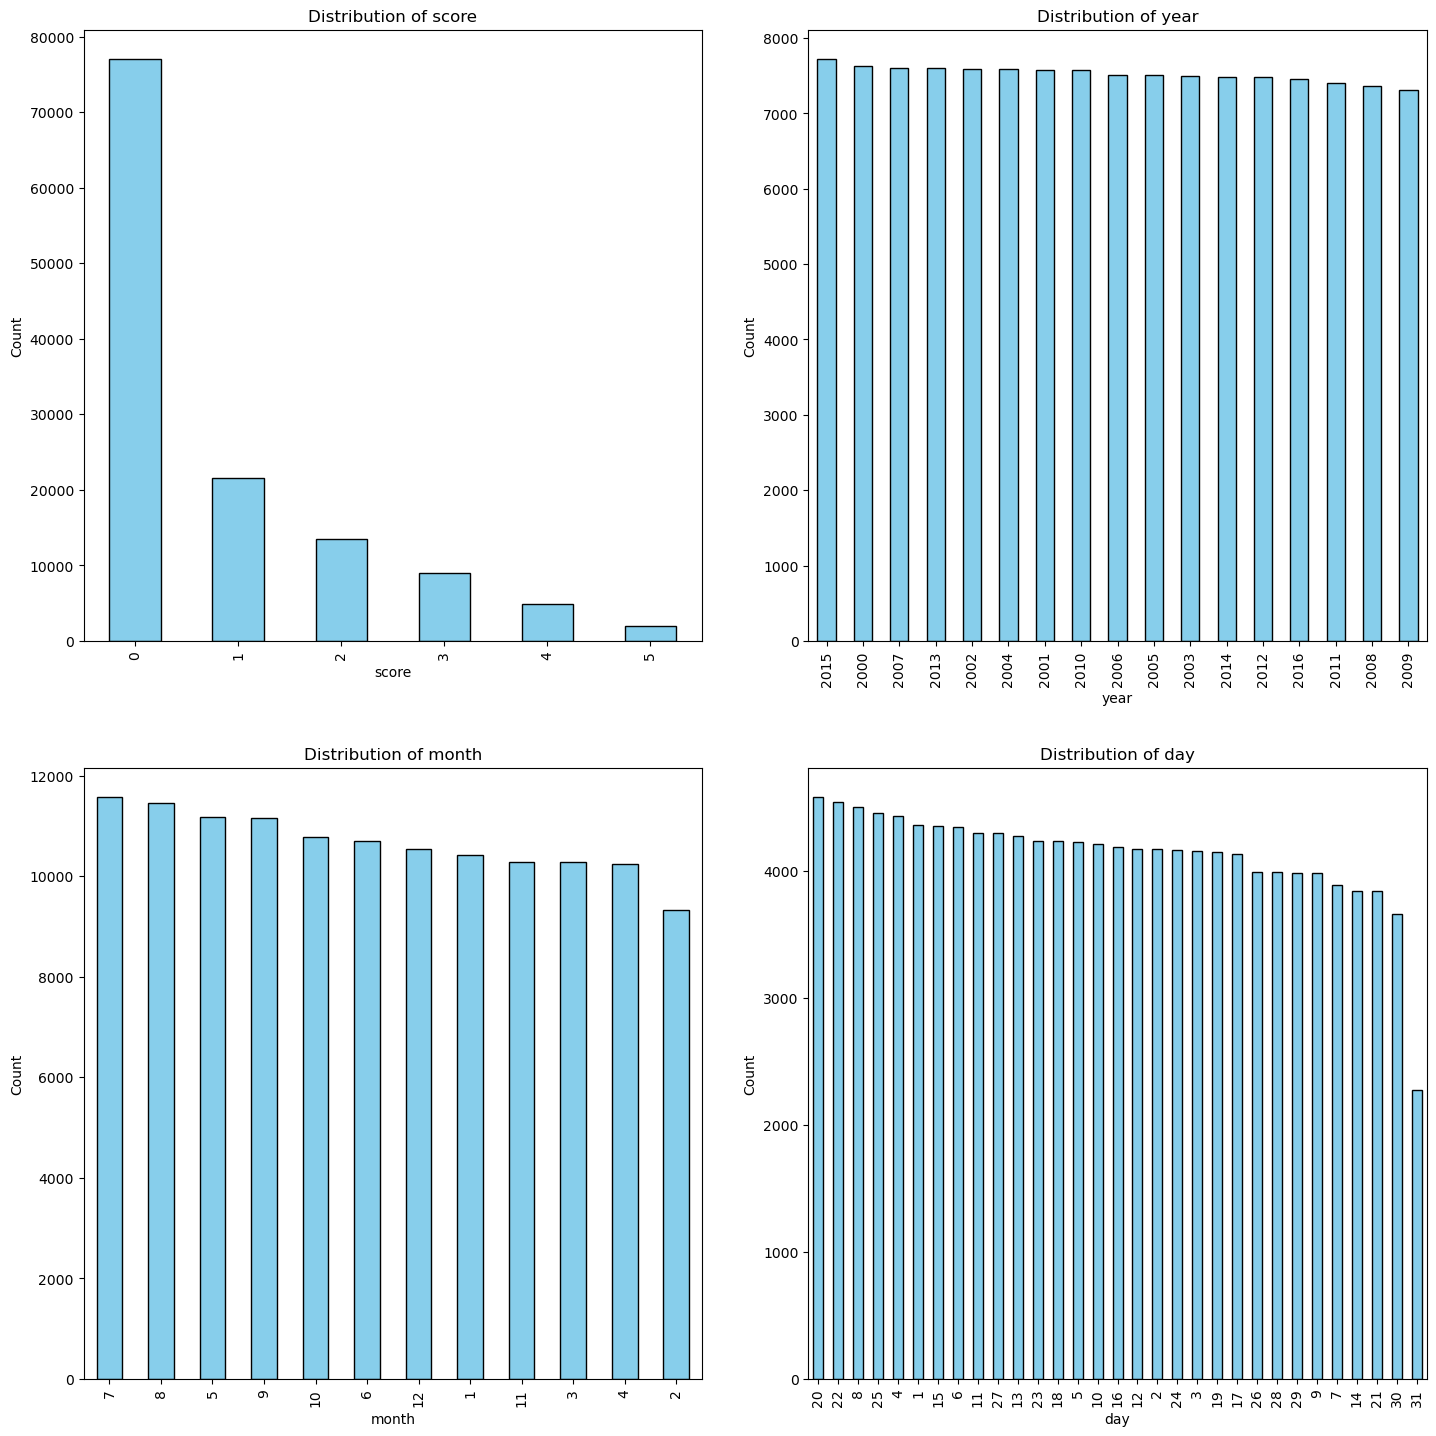

In [ ]:
#For Non- Merged Data
plt.figure(figsize=(15, 15))
for i, col_name in enumerate(categorical_column_list, start=1):
    plt.subplot(2, 2, i)
    drought_df_categorical_m[col_name].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col_name}')
    plt.tight_layout(pad=3.0)

plt.show()

### Bivariate Analysis

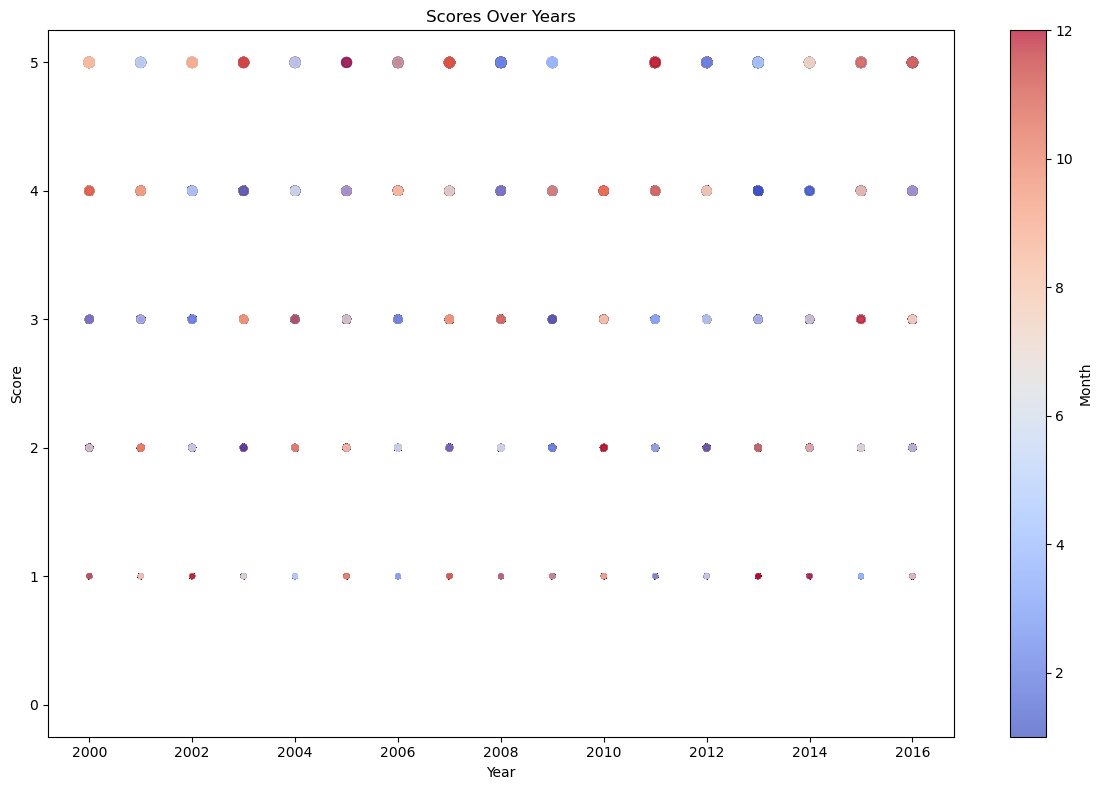

In [ ]:
# For Non- Merged Data
colors = train_data_X['month']
marker_size = train_data_X['score'] * 10
plt.figure(figsize=(12, 8))
plt.scatter(train_data_X['year'], train_data_X['score'], c=colors, s=marker_size, cmap='coolwarm', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Scores Over Years')
plt.colorbar(label='Month', orientation='vertical')
plt.tight_layout()
plt.show()


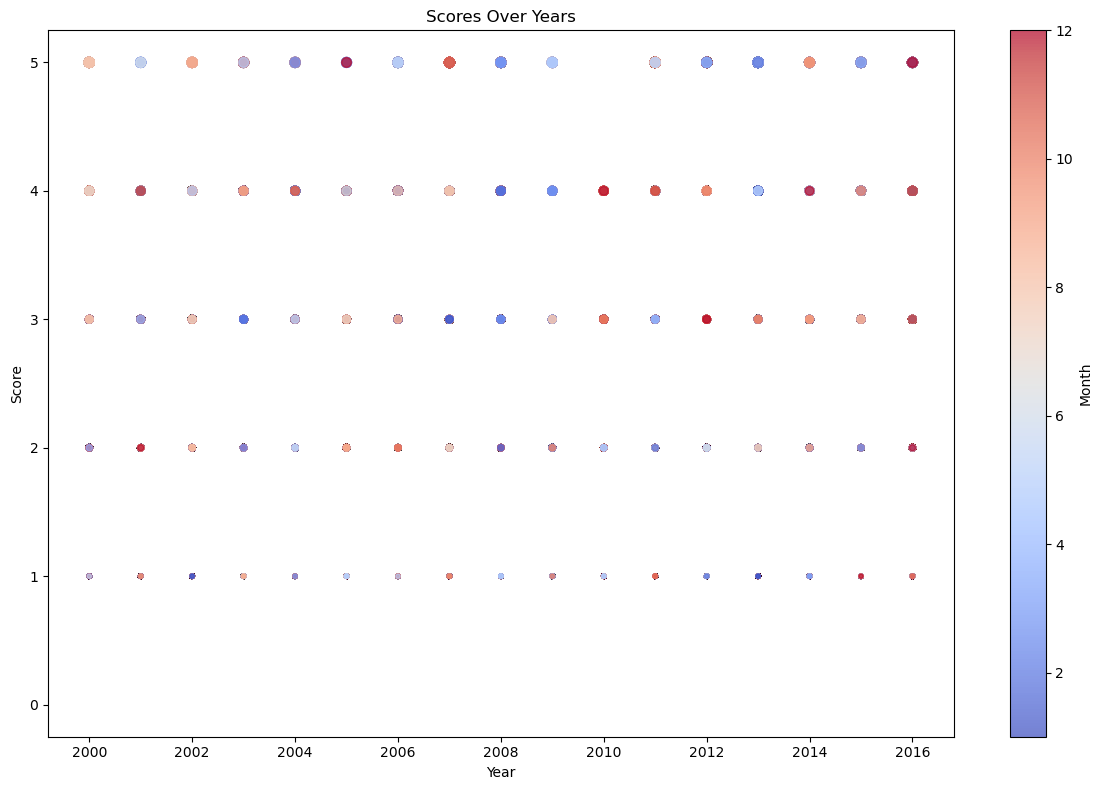

In [ ]:
# For Merged Data
colors = train_data_X_m['month']
marker_size = train_data_X_m['score'] * 10
plt.figure(figsize=(12, 8))
plt.scatter(train_data_X_m['year'], train_data_X_m['score'], c=colors, s=marker_size, cmap='coolwarm', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Scores Over Years')
plt.colorbar(label='Month', orientation='vertical')
plt.tight_layout()
plt.show()


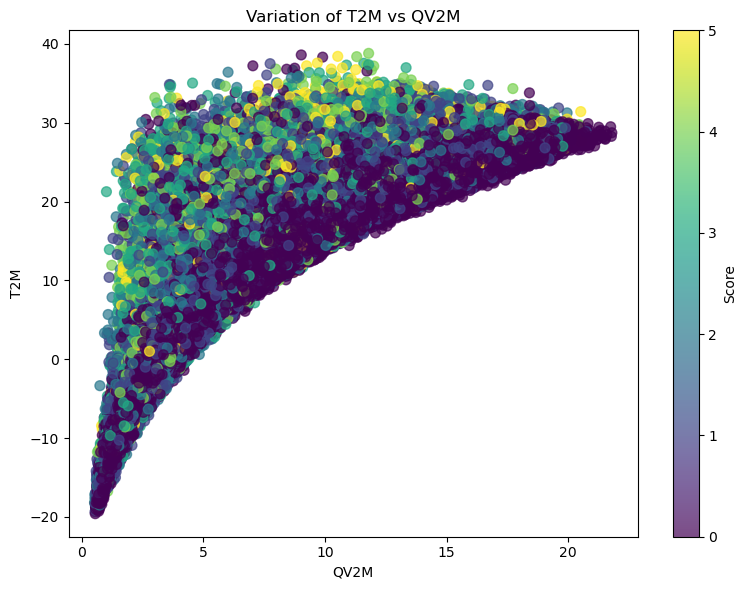

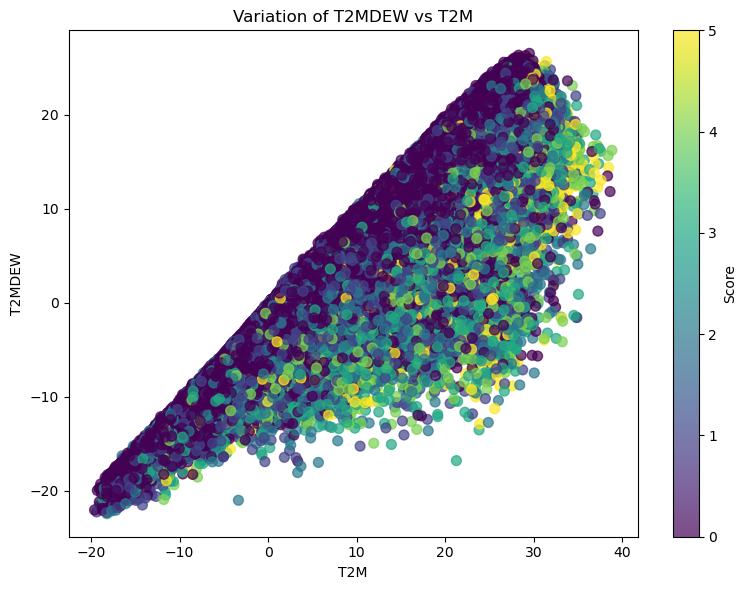

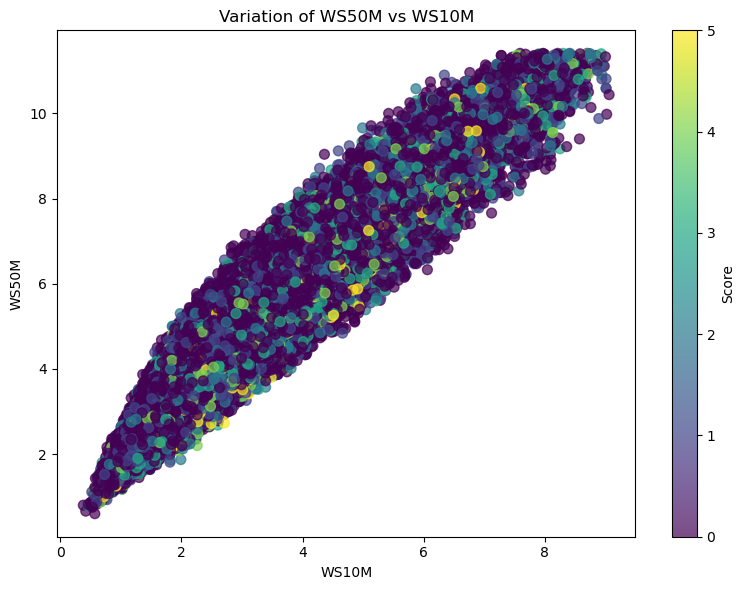

In [ ]:
# For Non-Merged Data
import matplotlib.pyplot as plt

def custom_scatter_plot(x_data, y_data, color_data, title, x_label, y_label, marker_size=50, colorbar_label='Score'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x_data, y_data, c=color_data, s=marker_size, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label=colorbar_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot 1
custom_scatter_plot(train_data_X['QV2M'], train_data_X['T2M'], train_data_X['score'], 'Variation of T2M vs QV2M', 'QV2M', 'T2M')

# Plot 2
custom_scatter_plot(train_data_X['T2M'], train_data_X['T2MDEW'], train_data_X['score'], 'Variation of T2MDEW vs T2M', 'T2M', 'T2MDEW')

# Plot 3
custom_scatter_plot(train_data_X['WS10M'], train_data_X['WS50M'], train_data_X['score'], 'Variation of WS50M vs WS10M', 'WS10M', 'WS50M')



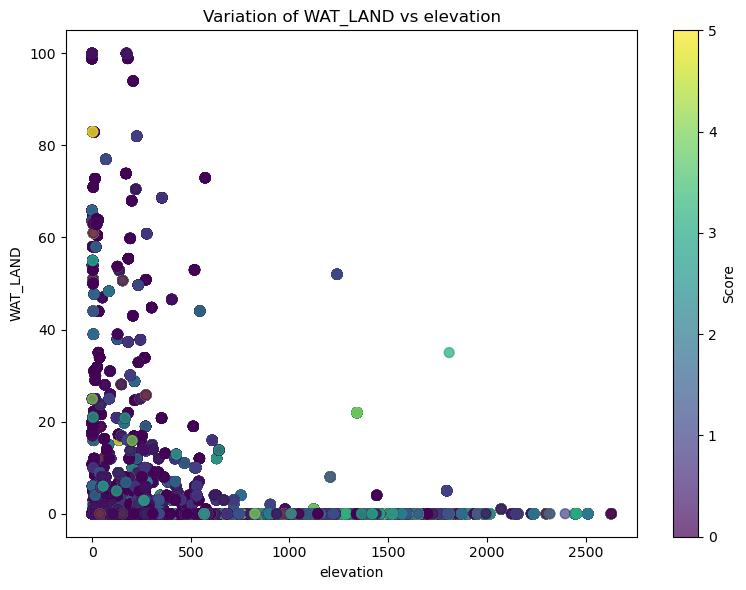

In [ ]:
# For Merged Data
# Plot 4
custom_scatter_plot(train_data_X_m['elevation'], train_data_X_m['WAT_LAND'], train_data_X_m['score'], 'Variation of WAT_LAND vs elevation', 'elevation', 'WAT_LAND')

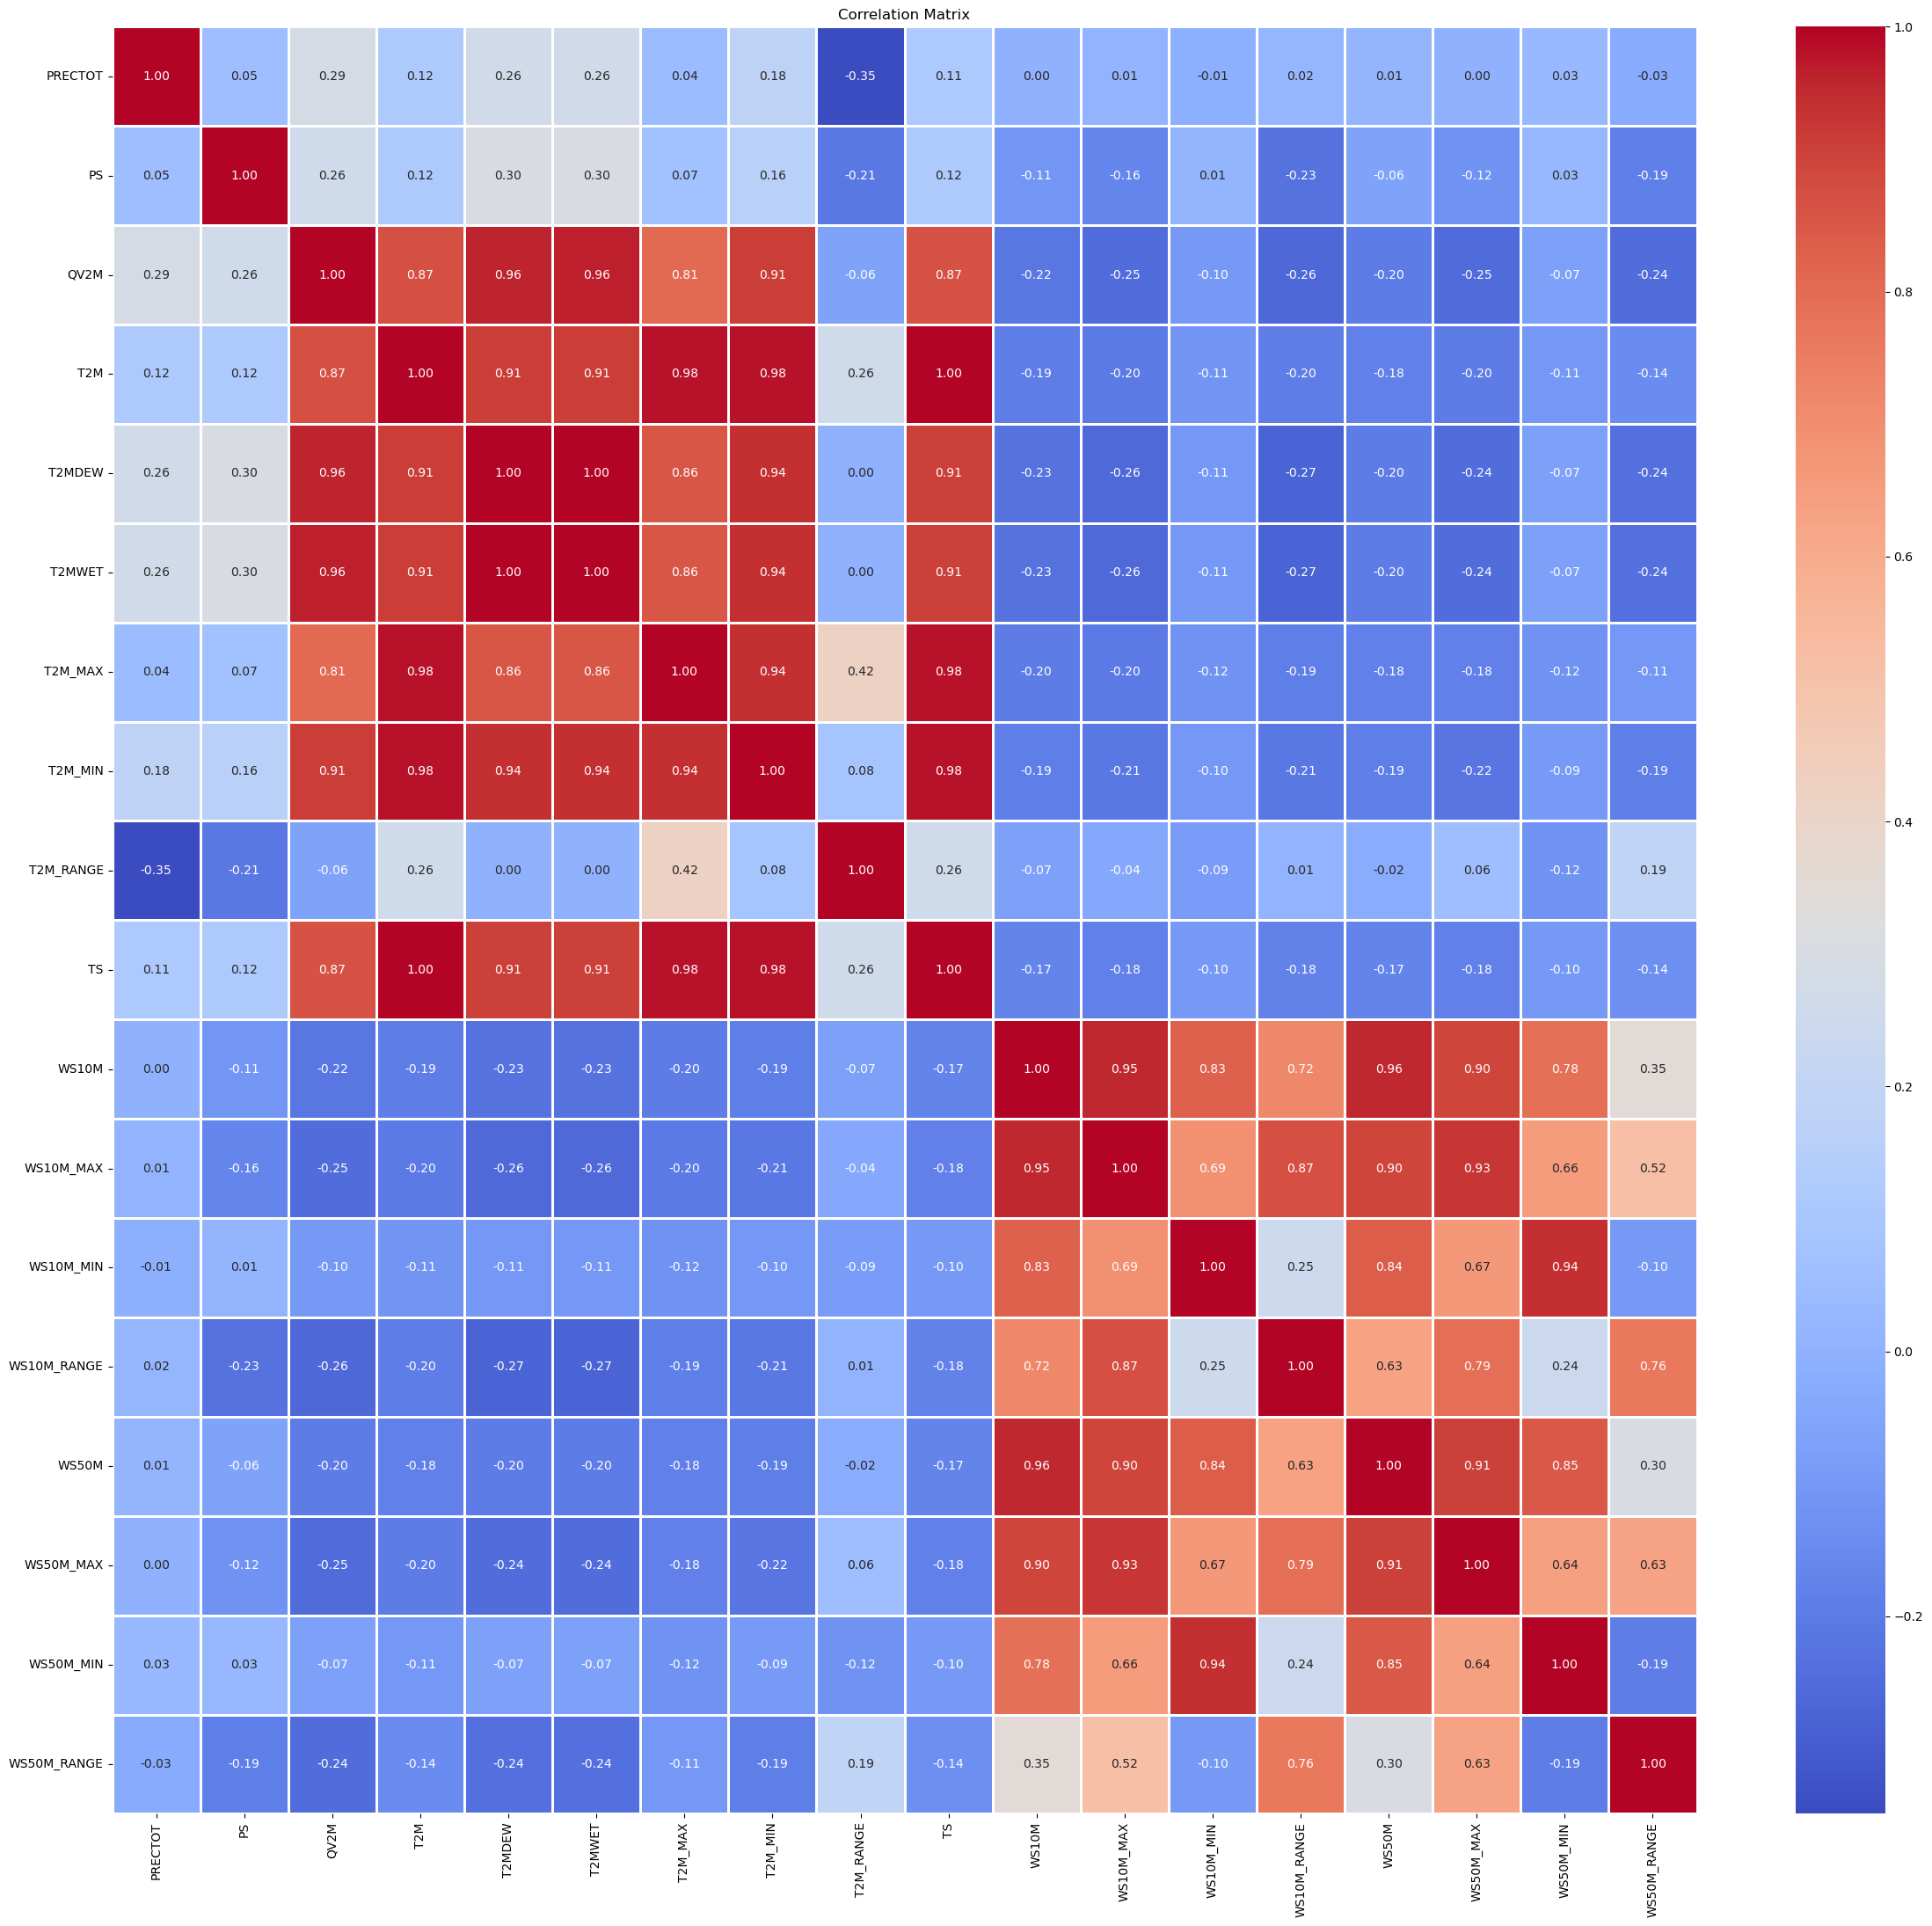

In [ ]:
# For Non-Merged Data
drought_df_measures = train_data_X[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]
correlation_mat= drought_df_measures.corr()
plt.figure(figsize=(24, 22))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

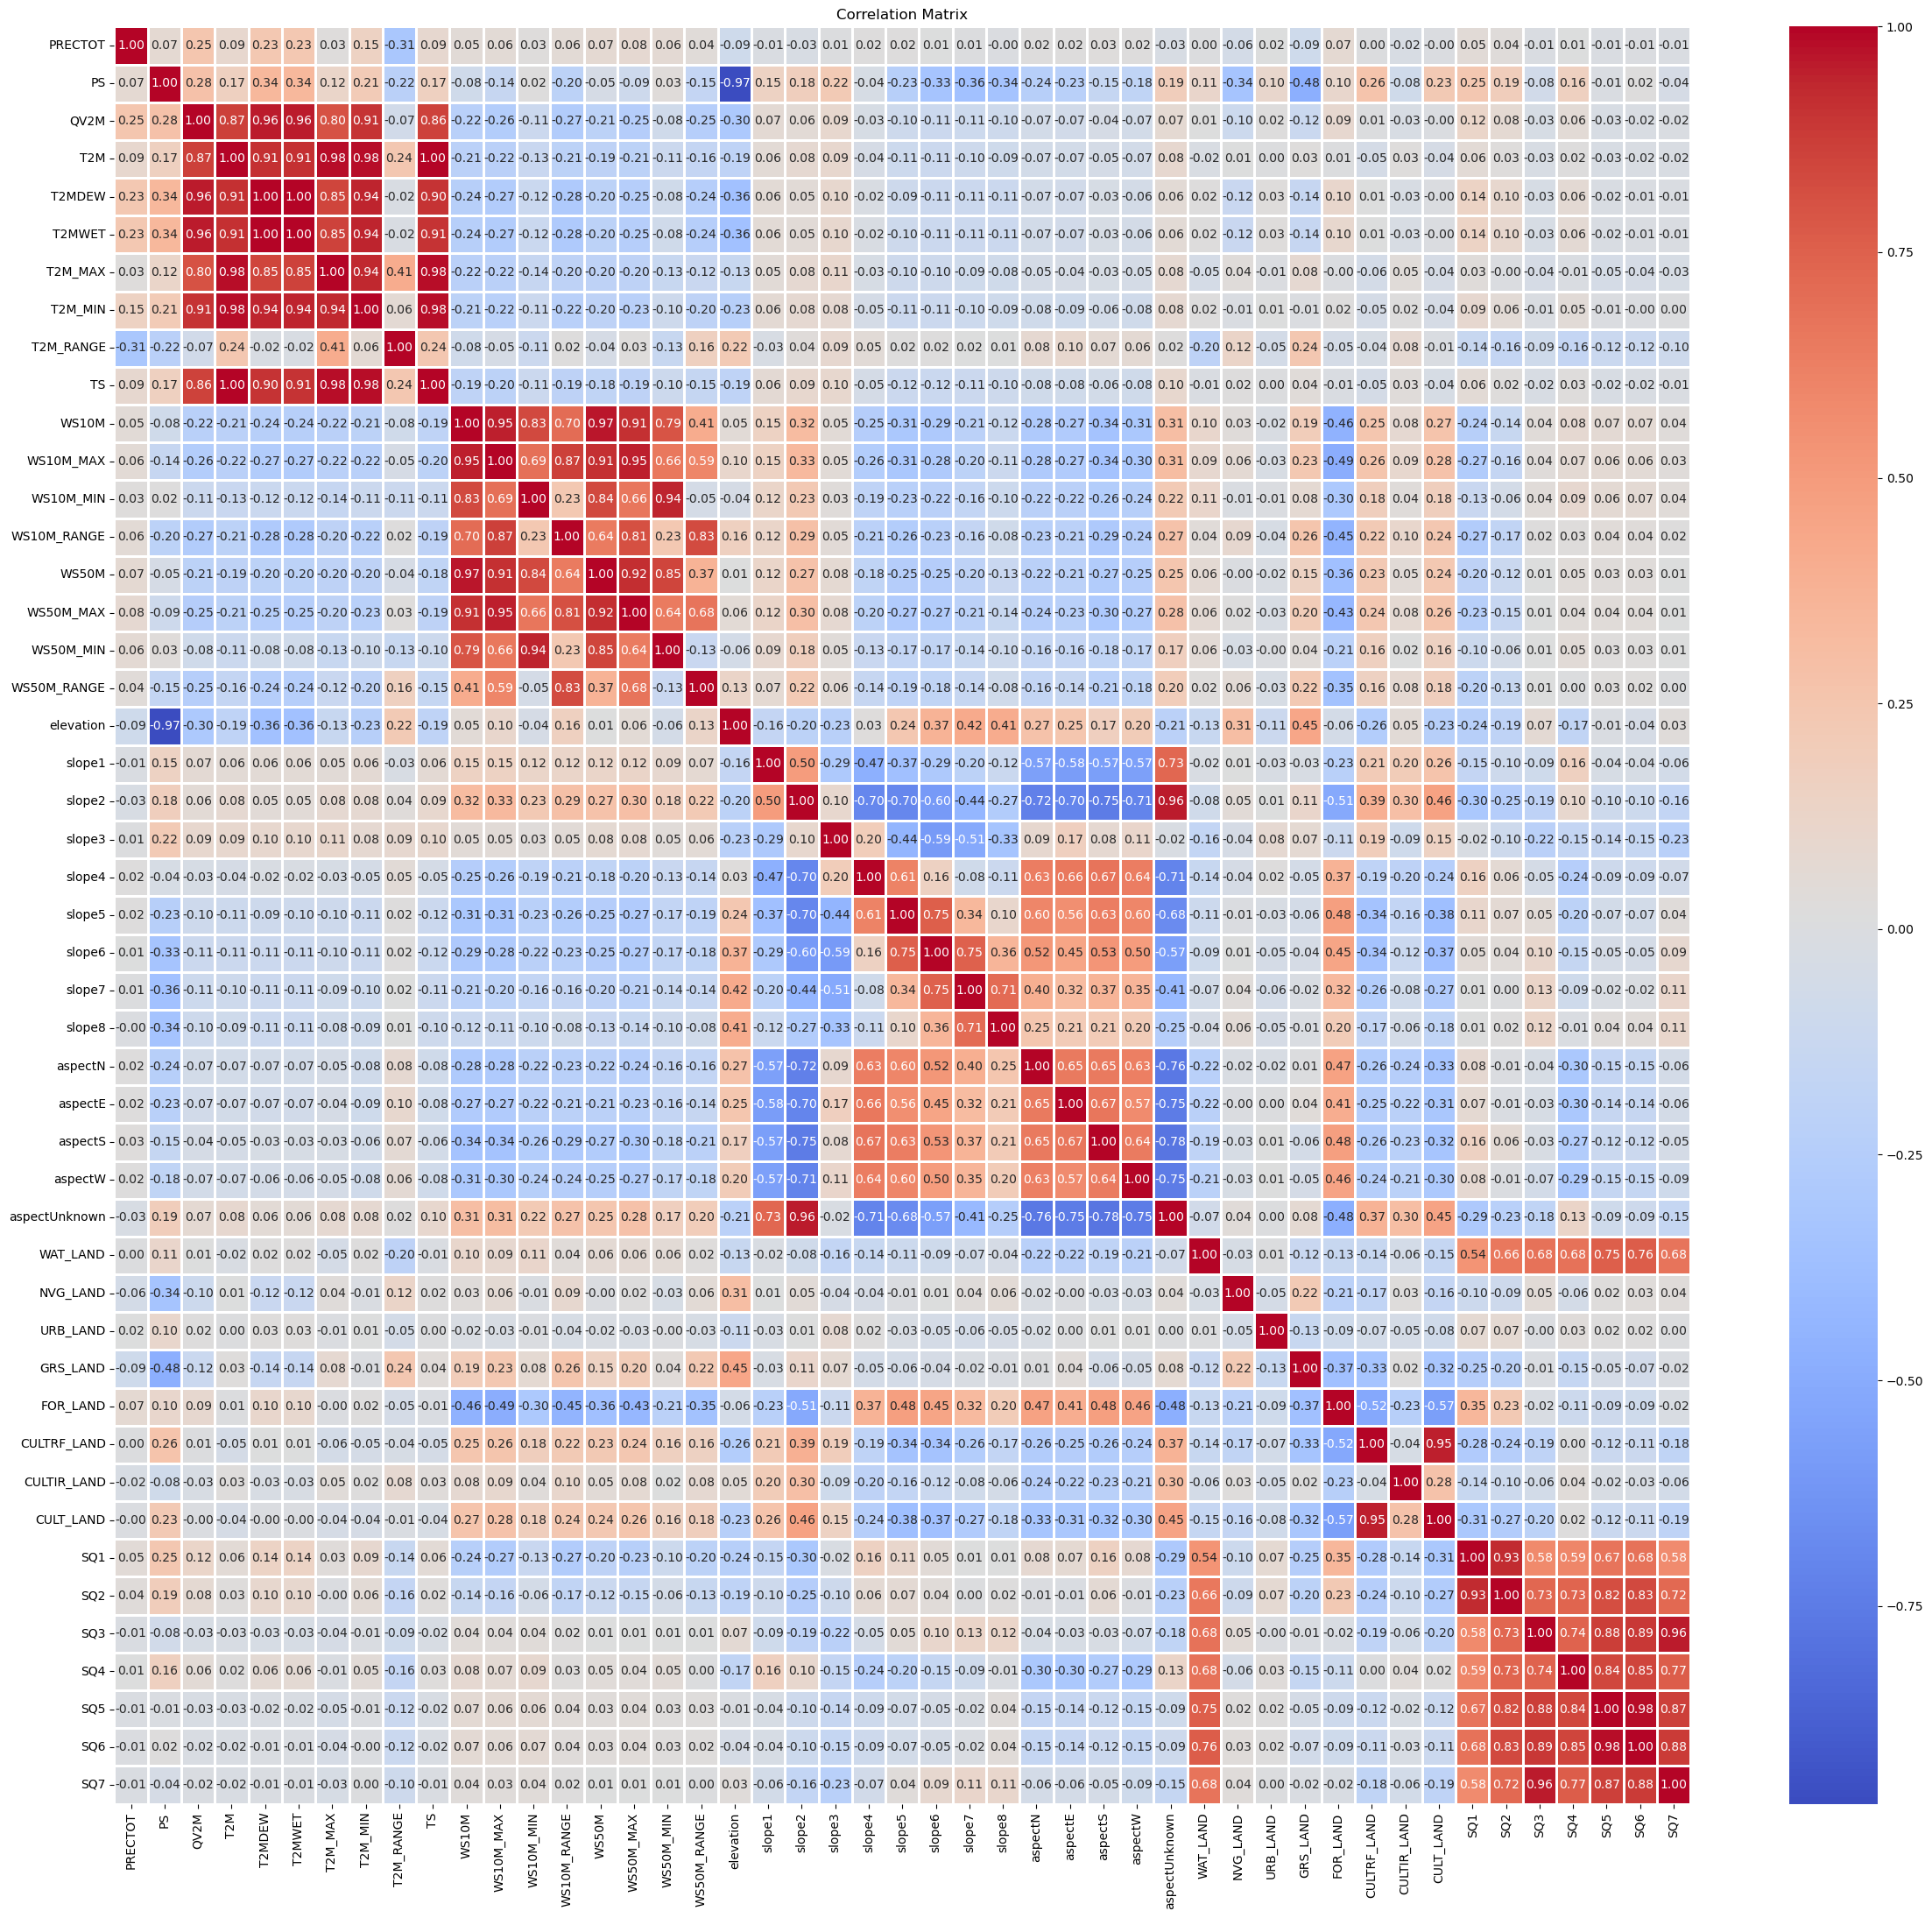

In [ ]:
correlation_plot = drought_df_measures_m.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_plot, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

None of the features have direct correlation to the score. Hence we need to revert back to other methods of identifying better features.

In [ ]:
# For Non-Merged Data
independent_variables = train_data_X.drop('score', axis=1)
independent_variables = independent_variables.drop('fips', axis=1)
independent_variables = independent_variables.drop('date', axis=1)
independent_variables.head()

PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  \
15398891    15.39   93.41   9.04  13.15   11.42   11.42    14.83    11.61   
11433166     4.13   96.49  11.29  19.52   15.24   15.24    25.54    13.90   
1797073      0.05  101.93  16.40  24.79   22.11   22.11    27.73    22.47   
8516111     21.18  100.47   8.39  11.90   10.97   10.97    17.10     3.50   
9736771      0.05   84.37   8.00  23.38    7.95    7.96    30.91    16.21   

          T2M_RANGE     TS  ...  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  \
15398891       3.22  13.12  ...       3.68       1.07         2.61   4.37   
11433166      11.65  19.51  ...       2.21       1.32         0.89   4.12   
1797073        5.27  24.10  ...       6.44       4.56         1.88   7.61   
8516111       13.60  11.65  ...       5.83       1.84         3.99   6.60   
9736771       14.71  22.68  ...       2.69       0.86         1.83   2.64   

          WS50M_MAX  WS50M_MIN  WS50M_RANGE  year  month  day  
15398891       6.34       2.56         3.79  2011     10   11  
11433166       4.89       2.24         2.65  2001      7   10  
1797073        9.33       6.25         3.08  2006      7   11  
8516111        8.59       3.89         4.70  2006      1   10  
9736771        4.54       1.14         3.41  2015      8   11  

[5 rows x 21 columns]

In [ ]:
# For Merged Data
independent_variables_m = train_data_X_m.drop('score', axis=1)
independent_variables_m = independent_variables_m.drop('fips', axis=1)
independent_variables_m = independent_variables_m.drop('date', axis=1)
independent_variables_m.head()

PRECTOT     PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  T2M_RANGE  \
0    15.39  93.41   9.04  13.15   11.42   11.42    14.83    11.61       3.22   
1     0.65  93.89  13.91  24.83   18.12   18.12    31.57    18.36      13.21   
2     2.11  92.83   2.29  -4.78   -8.20   -8.05    -1.41   -11.80      10.39   
3    11.89  93.37  13.42  21.54   17.40   17.40    26.35    17.03       9.31   
4     3.08  92.45   6.28  10.20    5.51    5.52    13.25     5.66       7.59   

      TS  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  \
0  13.12  ...    12.028023     0.346591  12.374614    3    2    1    1    1   
1  24.95  ...    12.028023     0.346591  12.374614    3    2    1    1    1   
2  -4.73  ...    12.028023     0.346591  12.374614    3    2    1    1    1   
3  21.15  ...    12.028023     0.346591  12.374614    3    2    1    1    1   
4  10.19  ...    12.028023     0.346591  12.374614    3    2    1    1    1   

   SQ6  SQ7  
0    1    1  
1    1    1  
2    1    1  
3    1    1  
4    1    1  

[5 rows x 52 columns]

In [ ]:
# For Non-Merged Data
test_independent_variables = test_data_X.drop('score', axis = 1)
test_independent_variables = test_independent_variables.drop('fips', axis =1)
test_independent_variables = test_independent_variables.drop('date', axis =1)
test_independent_variables.head()


PRECTOT      PS  QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  T2M_RANGE  \
0      2.25  100.51  9.69  14.71   13.55   13.52    17.38    10.92       6.46   
7      0.05  100.57  8.75  13.15   12.01   11.98    20.04     9.36      10.68   
14     0.00  101.07  4.04   3.91    0.94    0.96     9.40     1.02       8.38   
21     0.03  101.14  4.96   6.03    3.81    3.08    12.43    -1.63      14.06   
28     5.79  100.36  3.69   2.23   -0.41   -1.03     7.33    -5.19      12.52   

       TS  ...  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  WS50M_MAX  \
0   14.63  ...       1.50       0.79         0.71   2.74       4.01   
7   13.05  ...       3.40       1.68         1.72   5.13       6.51   
14   3.91  ...       2.40       1.36         1.04   3.28       4.13   
21   6.08  ...       4.57       2.49         2.07   6.65       8.56   
28   2.18  ...       4.52       1.71         2.81   5.62       6.96   

    WS50M_MIN  WS50M_RANGE  year  month  day  
0        1.23         2.78  2019      1    1  
7        3.67         2.85  2019      1    8  
14       2.39         1.75  2019      1   15  
21       5.01         3.55  2019      1   22  
28       3.60         3.35  2019      1   29  

[5 rows x 21 columns]

In [ ]:
# For Non-Merged Data
test_independent_variables_m = test_data_X_m.drop('score', axis = 1)
test_independent_variables_m = test_independent_variables_m.drop('fips', axis =1)
test_independent_variables_m = test_independent_variables_m.drop('date', axis =1)
test_independent_variables_m.head()


PRECTOT      PS  QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  T2M_RANGE  \
0     2.25  100.51  9.69  14.71   13.55   13.52    17.38    10.92       6.46   
1     0.05  100.57  8.75  13.15   12.01   11.98    20.04     9.36      10.68   
2     0.00  101.07  4.04   3.91    0.94    0.96     9.40     1.02       8.38   
3     0.03  101.14  4.96   6.03    3.81    3.08    12.43    -1.63      14.06   
4     5.79  100.36  3.69   2.23   -0.41   -1.03     7.33    -5.19      12.52   

      TS  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  \
0  14.63  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
1  13.05  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
2   3.91  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
3   6.08  ...    56.293411     1.014811  57.308224    1    1    1    1    1   
4   2.18  ...    56.293411     1.014811  57.308224    1    1    1    1    1   

   SQ6  SQ7  
0    1    2  
1    1    2  
2    1    2  
3    1    2  
4    1    2  

[5 rows x 52 columns]

## Model Building
- We built models by merging weather data and soil data and also just weather data. This allowed us to explore the potential benefits of adding soil-specific information into our models while also assessing the performance of models built solely on training data.

- To enhance the effectiveness of our models, we applied two preprocessing techniques: Standard scaling and Principal Component Analysis (PCA) transformation. Standard scaling ensured that all features were standardized, preventing any particular attribute from dominating the model. Whereas PCA helped us reduce dimensionality while retaining essential information, so we could avoid the risk of overfitting and enhancing model efficiency.

- We used GridsearchCV for hyperparameter tuning to find optimal parameters from the attributes set. GridsearchCV resulted in the highest model performance and fine-tuning our models.

- We built models using Logistic regression, Decision tree, Random Forest, Naïve Bayes Classifier, Bagging classifier and MLP models. We used accuracy as a measure for evaluating these models.


In [ ]:
# For Non-Merged Data
sc = StandardScaler()
X_train = sc.fit_transform(independent_variables)
X_test = sc.transform(test_independent_variables)
y_train = train_data_X['score']
y_test = test_data_X['score']
X_train

array([[ 3.49272723, -0.87054929,  0.20907409, ...,  0.61303621,
         1.00654259, -0.53067339],
       [ 0.55939202, -0.16850221,  0.68637873, ..., -1.42283819,
         0.12408717, -0.64449638],
       [-0.50348609,  1.07147705,  1.7703906 , ..., -0.40490099,
         0.12408717, -0.53067339],
       ...,
       [-0.51390647,  0.91647964,  1.45643022, ...,  1.22379854,
        -0.46421643, -0.3030274 ],
       [-0.49827591,  0.38766496, -0.50157949, ..., -0.40490099,
         0.71239078,  0.37991055],
       [-0.51651156, -0.09556225, -1.27587368, ..., -0.40490099,
        -1.34667185,  1.40431748]])

In [ ]:
# For Merged Data
X_train_m = sc.fit_transform(independent_variables_m)
X_test_m = sc.transform(test_independent_variables_m)
y_train_m = train_data_X_m['score']
y_test_m = test_data_X_m['score']
X_train_m

array([[ 3.49272723, -0.87054929,  0.20907409, ..., -0.15082074,
        -0.14233867, -0.2709869 ],
       [-0.34718049, -0.76113935,  1.24217347, ..., -0.15082074,
        -0.14233867, -0.2709869 ],
       [ 0.03316315, -1.00275296, -1.22283983, ..., -0.15082074,
        -0.14233867, -0.2709869 ],
       ...,
       [-0.51651156, -1.33098276, -1.31405806, ..., -0.15082074,
        -0.14233867, -0.2709869 ],
       [-0.4227282 , -1.47002455, -0.46975918, ..., -0.15082074,
        -0.14233867, -0.2709869 ],
       [-0.50348609, -1.47914205, -0.34247794, ..., -0.15082074,
        -0.14233867, -0.2709869 ]])

In [ ]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train_m = pca.fit_transform(X_train_m)
X_test_m = pca.transform(X_test_m)

In [ ]:
# logistic_reg = LogisticRegression(solver='newton-cg')

# logistic_reg.fit(X_train, y_train)

# y_pred = logistic_reg.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy of the model: {accuracy:.2f}")

### LogisticRegression


In [ ]:
# For Non-Merged Data
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
}

logistic_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy:.2f}")


/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected v

Best Parameters: {'C': 1.0, 'solver': 'newton-cg'}
Best Score: 0.601186462146452
Accuracy of the model: 0.75


In [ ]:
# For Merged Data
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
}

logistic_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5,n_jobs=-1)

grid_search.fit(X_train_m, y_train_m)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred_m = best_model.predict(X_test_m)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
accuracy = accuracy_score(y_test_m, y_pred_m)

print(f"Accuracy of the model: {accuracy:.2f}")


/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Best Parameters: {'C': 10.0, 'solver': 'liblinear'}
Best Score: 0.6003267085615166
Accuracy of the model: 0.75


### DecisionTreeClassifier

In [ ]:
print(len(y_test_m), len(y_pred_m),len(X_test_m),len(test_data_X_m['score']),len(X_test_m))

326340 326340 326340 326340 326340


In [ ]:
# decision_tree = DecisionTreeClassifier()

# decision_tree.fit(X_train, y_train)

# y_pred_tree = decision_tree.predict(X_test)

# accuracy_tree = accuracy_score(y_test, y_pred_tree)
# print("Decision Tree Accuracy:", accuracy_tree)

In [ ]:
# For Non-Merged Data
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier()

grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, cv=5,n_jobs=-1)

grid_search_tree.fit(X_train, y_train)

best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

best_model_tree = grid_search_tree.best_estimator_
y_pred_tree = best_model_tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Best Parameters for Decision Tree:", best_params_tree)
print("Best Score for Decision Tree:", best_score_tree)
print("Decision Tree Accuracy:", accuracy_tree)


/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/satvikkalyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 0.6025464517435531
Decision Tree Accuracy: 0.7528344671201814


In [ ]:
# # For Merged Data
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier()

grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, cv=5,n_jobs=-1)

grid_search_tree.fit(X_train_m, y_train_m)

best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

best_model_tree = grid_search_tree.best_estimator_
y_pred_tree = best_model_tree.predict(X_test_m)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Best Parameters for Decision Tree:", best_params_tree)
print("Best Score for Decision Tree:", best_score_tree)
print("Decision Tree Accuracy:", accuracy_tree)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 0.6031561149656441
Decision Tree Accuracy: 0.8648814120242692


### Random Forest Classifier

In [ ]:
# random_forest = RandomForestClassifier()

# random_forest.fit(X_train, y_train)

# y_pred_forest = random_forest.predict(X_test)

# accuracy_forest = accuracy_score(y_test, y_pred_forest)
# print("Random Forest Accuracy:", accuracy_forest)

# y_test_pred_rand = random_forest.predict(test_independent_variables)
# accuracy_tree = accuracy_score(test_data_X['score'], y_test_pred_rand)
# print(accuracy_tree)


Random Forest Accuracy: 0.8143282653151952


In [ ]:
# For Non-Merged Data
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestClassifier()

grid_search_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_forest, cv=5, n_jobs=-1)

grid_search_forest.fit(X_train, y_train)

best_params_forest = grid_search_forest.best_params_
best_score_forest = grid_search_forest.best_score_


best_model_forest = grid_search_forest.best_estimator_
y_pred_forest = best_model_forest.predict(X_test)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Best Parameters for Random Forest:", best_params_forest)
print("Best Score for Random Forest:", best_score_forest)
print("Random Forest Accuracy:", accuracy_forest)

Best Parameters for Random Forest:  {n_estimators: 100, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Random Forest: 0.61238963249781248
Random Forest Accuracy: 0.81328682528349383


In [ ]:
# For Merged Data
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestClassifier()

grid_search_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_forest, cv=5, n_jobs=-1)

grid_search_forest.fit(X_train_m, y_train_m)

best_params_forest = grid_search_forest.best_params_
best_score_forest = grid_search_forest.best_score_


best_model_forest = grid_search_forest.best_estimator_
y_pred_forest = best_model_forest.predict(X_test_m)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Best Parameters for Random Forest:", best_params_forest)
print("Best Score for Random Forest:", best_score_forest)
print("Random Forest Accuracy:", accuracy_forest)

Best Parameters for Random Forest:  {n_estimators: 50, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Random Forest: 0.6073612239656635
Random Forest Accuracy: 0.81221352268347536


### Support Vector Machines

In [ ]:
# svm = SVC()

# svm.fit(X_train, y_train)

# y_pred_svm = svm.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("SVM Accuracy:", accuracy_svm)


In [ ]:
# # For Non-Merged Data
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# svm = SVC()

# grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5,n_jobs=-1)

# grid_search_svm.fit(X_train, y_train)

# best_params_svm = grid_search_svm.best_params_
# best_score_svm = grid_search_svm.best_score_

# best_model_svm = grid_search_svm.best_estimator_
# y_pred_svm = best_model_svm.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("Best Parameters for SVM:", best_params_svm)
# print("Best Score for SVM:", best_score_svm)
# print("SVM Accuracy:", accuracy_svm)


In [ ]:
# # For Merged Data
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# svm = SVC()

# grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5,n_jobs=-1)

# grid_search_svm.fit(X_train_m, y_train_m)

# best_params_svm = grid_search_svm.best_params_
# best_score_svm = grid_search_svm.best_score_

# best_model_svm = grid_search_svm.best_estimator_
# y_pred_svm = best_model_svm.predict(X_test_m)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("Best Parameters for SVM:", best_params_svm)
# print("Best Score for SVM:", best_score_svm)
# print("SVM Accuracy:", accuracy_svm)


### K Means

In [ ]:
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=5, random_state=42)

# kmeans.fit(X_train)

# cluster_labels = kmeans.labels_

# print("Cluster Labels:", cluster_labels)


Cluster Labels: [1 2 1 ... 1 3 3]


In [ ]:
# kmeans = KMeans(n_clusters=5, random_state=42)

# param_grid = {
#     'init': ['k-means++', 'random'],
#     'algorithm': ['auto', 'full', 'elkan'],
#     'n_init': [10, 20, 30]
# }

# grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5)

# grid_search.fit(X_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
    
KeyboardInterrupt: 
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


### Naive Bayes Model

In [ ]:
# naive_bayes = GaussianNB()

# naive_bayes.fit(X_train, y_train)

# y_pred_nb = naive_bayes.predict(X_test)

# accuracy_nb = accuracy_score(y_test, y_pred_nb)
# print("Naive Bayes Accuracy:", accuracy_nb)
# y_pred_nb_test = naive_bayes.predict(test_independent_variables)
# accuracy_nb = accuracy_score(test_data_X['score'], y_pred_nb_test)
# print(accuracy_nb)


Naive Bayes Accuracy: 0.5808841953813947


In [ ]:
#For Non-Merged Data
naive_bayes = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5,n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_nb = grid_search.best_params_
best_score_nb = grid_search.best_score_

best_model_nb = grid_search.best_estimator_
y_pred_nb = best_model_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Best Parameters for Naive Bayes:", best_params_nb)
print("Best Score for Naive Bayes:", best_score_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.5808841953813947


In [ ]:
# #For Merged Data
# naive_bayes = GaussianNB()

# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7]
# }

# grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5,n_jobs=-1)

# grid_search.fit(X_train_m, y_train_m)

# best_params_nb = grid_search.best_params_
# best_score_nb = grid_search.best_score_

# best_model_nb = grid_search.best_estimator_
# y_pred_nb = best_model_nb.predict(X_test_m)

# accuracy_nb = accuracy_score(y_test, y_pred_nb)
# print("Best Parameters for Naive Bayes:", best_params_nb)
# print("Best Score for Naive Bayes:", best_score_nb)
# print("Naive Bayes Accuracy:", accuracy_nb)


### Gradient Boosting Classifier

In [ ]:
# gradient_boosting = GradientBoostingClassifier()

# gradient_boosting.fit(X_train, y_train)

# y_pred_gb = gradient_boosting.predict(X_test)

# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# print("Gradient Boosting Accuracy:", accuracy_gb)
# y_pred_nb_test = gradient_boosting.predict(test_independent_variables)
# accuracy_nb = accuracy_score(test_data_X['score'], y_pred_nb_test)
# print(accuracy_nb)


KeyboardInterrupt: ignored

In [ ]:
# #For Non-Merged Data
# gradient_boosting = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7]
# }

# grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5,n_jobs=-1)

# grid_search.fit(X_train, y_train)

# best_params_gb = grid_search.best_params_
# best_score_gb = grid_search.best_score_

# best_model_gb = grid_search.best_estimator_
# y_pred_gb = best_model_gb.predict(X_test)

# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# print("Best Parameters for Gradient Boosting:", best_params_gb)
# print("Best Score for Gradient Boosting:", best_score_gb)
# print("Gradient Boosting Accuracy:", accuracy_gb)


In [ ]:
# #For Merged Data
# gradient_boosting = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7]
# }

# grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5,n_jobs=-1)

# grid_search.fit(X_train_m, y_train_m)

# best_params_gb = grid_search.best_params_
# best_score_gb = grid_search.best_score_

# best_model_gb = grid_search.best_estimator_
# y_pred_gb = best_model_gb.predict(X_test_m)

# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# print("Best Parameters for Gradient Boosting:", best_params_gb)
# print("Best Score for Gradient Boosting:", best_score_gb)
# print("Gradient Boosting Accuracy:", accuracy_gb)


### MLP Classifier

In [ ]:

# mlp = MLPClassifier()

# mlp.fit(X_train, y_train)

# y_pred_mlp = mlp.predict(X_test)

# accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
# print("Neural Network (MLP) Accuracy:", accuracy_mlp)


Neural Network (MLP) Accuracy: 0.672427798928199


In [ ]:
# # For Non-Merged Data
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# mlp = MLPClassifier()

# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'alpha': [0.0001, 0.001, 0.01]
# }

# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5,n_jobs=-1)

# grid_search.fit(X_train, y_train)

# best_params_mlp = grid_search.best_params_
# best_score_mlp = grid_search.best_score_

# best_model_mlp = grid_search.best_estimator_
# y_pred_mlp = best_model_mlp.predict(X_test)

# accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
# print("Best Parameters for MLP:", best_params_mlp)
# print("Best Score for MLP:", best_score_mlp)
# print("Neural Network (MLP) Accuracy:", accuracy_mlp)


In [ ]:
# # For Merged Data
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# mlp = MLPClassifier()

# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'alpha': [0.0001, 0.001, 0.01]
# }

# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5,n_jobs=-1)

# grid_search.fit(X_train_m, y_train_m)

# best_params_mlp = grid_search.best_params_
# best_score_mlp = grid_search.best_score_

# best_model_mlp = grid_search.best_estimator_
# y_pred_mlp = best_model_mlp.predict(X_test_m)

# accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
# print("Best Parameters for MLP:", best_params_mlp)
# print("Best Score for MLP:", best_score_mlp)
# print("Neural Network (MLP) Accuracy:", accuracy_mlp)


### ANN

In [ ]:
# ann_model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# _, accuracy_ann = ann_model.evaluate(X_test, y_test)
# print("ANN Accuracy:", accuracy_ann)


Epoch 1/10
61859/61859 [==============================] - 223s 4ms/step - loss: -29272578.0000 - accuracy: 0.3522
Epoch 2/10
61859/61859 [==============================] - 219s 4ms/step - loss: -369374848.0000 - accuracy: 0.3519
Epoch 3/10
61859/61859 [==============================] - 218s 4ms/step - loss: -1493466368.0000 - accuracy: 0.3515
Epoch 4/10
61859/61859 [==============================] - 220s 4ms/step - loss: -3879723520.0000 - accuracy: 0.3512
Epoch 5/10
61859/61859 [==============================] - 220s 4ms/step - loss: -8003851264.0000 - accuracy: 0.3506
Epoch 6/10
61859/61859 [==============================] - 218s 4ms/step - loss: -14314049536.0000 - accuracy: 0.3507
Epoch 7/10
61859/61859 [==============================] - 219s 4ms/step - loss: -23293212672.0000 - accuracy: 0.3501
Epoch 8/10
61859/61859 [==============================] - 219s 4ms/step - loss: -35436859392.0000 - accuracy: 0.3504
Epoch 9/10
61859/61859 [==============================] - 220s 4ms/step 

In [ ]:
# # For Non-Merged Data
# batch_sizes = [16, 32, 64]
# epochs = [10, 20, 30]
# learning_rates = [0.001, 0.01, 0.1]

# best_accuracy = 0
# best_params = {}

# for batch_size in batch_sizes:
#     for epoch in epochs:
#         for lr in learning_rates:
#             # Create the model
#             ann_model = Sequential([
#                 Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#                 Dense(64, activation='relu'),
#                 Dense(1, activation='sigmoid')
#             ])

#             optimizer = Adam(lr=lr)
#             ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#             ann_model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, verbose=0)
#             _, accuracy = ann_model.evaluate(X_test, y_test)
#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_params = {'batch_size': batch_size, 'epochs': epoch, 'learning_rate': lr}

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_accuracy)


In [ ]:
# # For Merged Data
# batch_sizes = [16, 32, 64]
# epochs = [10, 20, 30]
# learning_rates = [0.001, 0.01, 0.1]

# best_accuracy = 0
# best_params = {}

# for batch_size in batch_sizes:
#     for epoch in epochs:
#         for lr in learning_rates:
#             # Create the model
#             ann_model = Sequential([
#                 Dense(64, activation='relu', input_shape=(X_train_m.shape[1],)),
#                 Dense(64, activation='relu'),
#                 Dense(1, activation='sigmoid')
#             ])

#             optimizer = Adam(lr=lr)
#             ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#             ann_model.fit(X_train_m, y_train_m, epochs=epoch, batch_size=batch_size, verbose=0)
#             _, accuracy = ann_model.evaluate(X_test, y_test)
#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_params = {'batch_size': batch_size, 'epochs': epoch, 'learning_rate': lr}

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_accuracy)


### AdaBoost Classifier

In [ ]:
# adaboost = AdaBoostClassifier()

# adaboost.fit(X_train, y_train)

# y_pred_adaboost = adaboost.predict(X_test)

# accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
# print("AdaBoost Accuracy:", accuracy_adaboost)


AdaBoost Accuracy: 0.6047713733763347


In [ ]:
# For Non-Merged Data
adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5,n_jobs=-1)

grid_search.fit(X_train, y_train)


best_params_adaboost = grid_search.best_params_
best_score_adaboost = grid_search.best_score_

best_model_adaboost = grid_search.best_estimator_
y_pred_adaboost = best_model_adaboost.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Best Parameters for AdaBoost:", best_params_adaboost)
print("Best Score for AdaBoost:", best_score_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)


Best Parameters for AdaBoost: {n_estimators: 100, learning_rate: 0.01}
Best Score for AdaBoost: 0.56637682699242
AdaBoost Accuracy: 0.6047713733763347


In [ ]:
# For Merged Data
adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5,n_jobs=-1)

grid_search.fit(X_train_m, y_train_m)


best_params_adaboost = grid_search.best_params_
best_score_adaboost = grid_search.best_score_

best_model_adaboost = grid_search.best_estimator_
y_pred_adaboost = best_model_adaboost.predict(X_test_m)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Best Parameters for AdaBoost:", best_params_adaboost)
print("Best Score for AdaBoost:", best_score_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)

Best Parameters for AdaBoost: {n_estimators: 50, learning_rate: 0.01}
Best Score for AdaBoost: 0.6045253773572
AdaBoost Accuracy: 0.4856382926389387


### Bagging Classifier

In [ ]:
# bagging = BaggingClassifier()

# bagging.fit(X_train, y_train)

# y_pred_bagging = bagging.predict(X_test)

# accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
# print("Bagging Classifier Accuracy:", accuracy_bagging)
# y_test_pred_bagging = bagging.predict(test_independent_variables)
# accuracy_bagging = accuracy_score(test_data_X['score'], y_test_pred_bagging)
# print(accuracy_bagging)


Bagging Classifier Accuracy: 0.8126874237170316


In [ ]:
# For Non-Merged Data
bagging = BaggingClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5,n_jobs=-1)


grid_search.fit(X_train, y_train)

best_params_bagging = grid_search.best_params_
best_score_bagging = grid_search.best_score_

best_model_bagging = grid_search.best_estimator_
y_pred_bagging = best_model_bagging.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Best Parameters for Bagging Classifier:", best_params_bagging)
print("Best Score for Bagging Classifier:", best_score_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)


Best Parameters for Bagging Classifier: {n_estimators: 100, max_samples: 0.8, max_features: 1.0}
Best Score for Bagging Classifier: 0.6542588735867753
Bagging Classifier Accuracy: 0.8126874237170316


In [ ]:
# For Merged Data
bagging = BaggingClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5,n_jobs=-1)


grid_search.fit(X_train_m, y_train_m)

best_params_bagging = grid_search.best_params_
best_score_bagging = grid_search.best_score_

best_model_bagging = grid_search.best_estimator_
y_pred_bagging = best_model_bagging.predict(X_test_m)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Best Parameters for Bagging Classifier:", best_params_bagging)
print("Best Score for Bagging Classifier:", best_score_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

Best Parameters for Bagging Classifier: {n_estimators: 100, max_samples: 0.8, max_features: 1.0}
Best Score for Bagging Classifier: 0.6542588735867753
Bagging Classifier Accuracy: 0.8948263158186134
